In [540]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import datetime
from pandas.api.types import CategoricalDtype

In [541]:
df = pd.read_pickle("Istanbul_Trafik_Endeksleri_(2019)_(Temiz).pkl")

In [542]:
KAYNAK = "Kaynak: https://data.ibb.gov.tr/dataset/trafik-indeksi-raporu"
all_figures = {}
fig_path = "./Figures/"

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86982 entries, 0 to 86981
Data columns (total 11 columns):
Zaman Damgası    86982 non-null datetime64[ns]
Trafik           86982 non-null float64
Tarih            86982 non-null datetime64[ns]
Saat             86982 non-null object
Ay               86982 non-null category
Gün              86982 non-null category
Ayın Günü        86982 non-null int64
Tam Saat         86982 non-null int64
Resmi Tatil      86982 non-null bool
Okul Tatili      86982 non-null bool
Haftasonu        86982 non-null bool
dtypes: bool(3), category(2), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 4.4+ MB


In [544]:
df['Trafik'].describe()

count    86982.000000
mean        26.169736
std         18.526181
min          1.000000
25%          8.000000
50%         26.000000
75%         40.000000
max         81.000000
Name: Trafik, dtype: float64

In [545]:
df[df['Trafik'] == df['Trafik'].max()]

Zaman Damgası  Trafik      Tarih      Saat       Ay  \
8572  2019-01-31 18:36:31.010    81.0 2019-01-31  18:36:31     Ocak   
8573  2019-01-31 18:41:00.000    81.0 2019-01-31  18:41:00     Ocak   
8574  2019-01-31 18:46:00.000    81.0 2019-01-31  18:46:00     Ocak   
8575  2019-01-31 18:51:00.000    81.0 2019-01-31  18:51:00     Ocak   
8576  2019-01-31 18:56:00.000    81.0 2019-01-31  18:56:00     Ocak   
48846 2019-06-29 15:53:00.000    81.0 2019-06-29  15:53:00  Haziran   
48859 2019-06-29 16:58:00.000    81.0 2019-06-29  16:58:00  Haziran   
48860 2019-06-29 17:03:00.000    81.0 2019-06-29  17:03:00  Haziran   
48861 2019-06-29 17:08:00.000    81.0 2019-06-29  17:08:00  Haziran   

             Gün  Ayın Günü  Tam Saat  Resmi Tatil  Okul Tatili  Haftasonu  
8572    Perşembe         31        18        False         True      False  
8573    Perşembe         31        18        False         True      False  
8574    Perşembe         31        18        False         True      False  
8575    Perşembe         31        18        False         True      False  
8576    Perşembe         31        18        False         True      False  
48846  Cumartesi         29        15        False         True       True  
48859  Cumartesi         29        16        False         True       True  
48860  Cumartesi         29        17        False         True       True  
48861  Cumartesi         29        17        False         True       True

In [546]:
emptyyear = pd.date_range(start="20190101", 
                     end="20191231", 
                     periods=365,
                     normalize=True)
alldays = set(emptyyear)
observationdays = set([i.normalize() for i in df['Zaman Damgası']])
nodata = list(alldays.difference(observationdays))
nodata.sort()
nodata_days = len(nodata)
nodata_percent = (1 - (len(observationdays)/len(alldays)))*100
print(f"Veri Olmayan Günler: {nodata_days} (%{nodata_percent:.1f})")
for day in nodata:
    print(day.date(), )

Veri Olmayan Günler: 57 (%15.6)
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-05-21
2019-07-19
2019-07-20
2019-07-21
2019-07-22
2019-07-23
2019-07-24
2019-07-25
2019-07-26
2019-07-27
2019-07-28
2019-07-29
2019-07-30
2019-07-31
2019-08-01
2019-08-02
2019-08-03
2019-08-04
2019-08-05
2019-08-06
2019-08-07
2019-08-08
2019-08-09
2019-08-10
2019-08-11
2019-08-12
2019-08-13
2019-08-14
2019-08-15
2019-08-16
2019-08-17
2019-08-18
2019-08-19
2019-08-20
2019-08-21
2019-08-22
2019-08-23
2019-08-24
2019-08-25
2019-08-26
2019-08-27
2019-08-28
2019-08-29
2019-08-30
2019-08-31
2019-09-01
2019-09-02
2019-09-03
2019-09-04
2019-09-05
2019-09-06
2019-09-07
2019-09-08


Genel Renkler


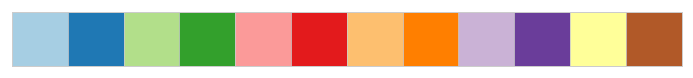

Isı Haritası Renkler


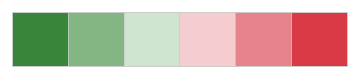

In [547]:
# Kullanacağımız renkler
print("Genel Renkler")
sns.palplot(sns.color_palette("Paired"))
plt.show()
print("Isı Haritası Renkler")
sns.palplot(sns.diverging_palette(128, 10, s=75, l=50, center='light'))
plt.show()

# Bunları bir kenara saklayalım
paired_pal = sns.color_palette("Paired")
hm_pal = sns.diverging_palette(128, 10, s=75, l=50, center='light', as_cmap=True)

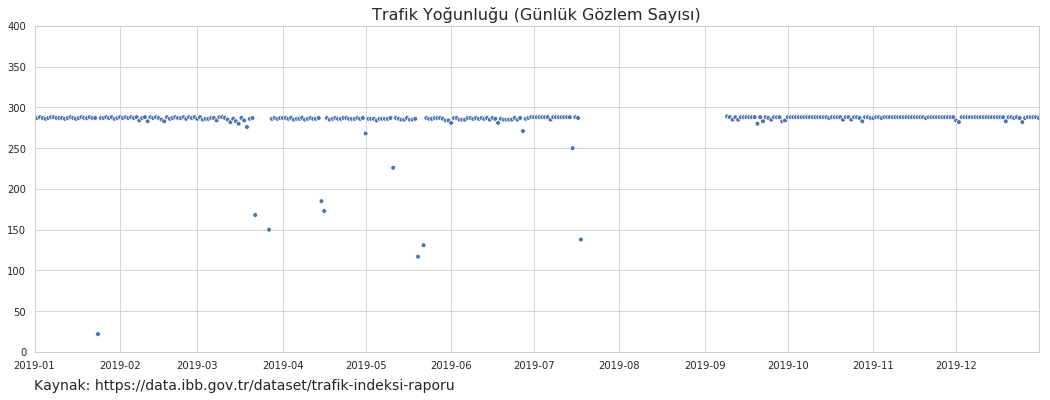

In [548]:
title = 'Trafik Yoğunluğu (Günlük Gözlem Sayısı)'
observationcounts = df.groupby('Tarih')['Trafik'].agg(["count"])
observationcounts = observationcounts.reindex(emptyyear)
sns.set(context='paper', style='whitegrid')
f, ax = plt.subplots(figsize=(18, 6))
p = sns.scatterplot(data=observationcounts,  
                    markers="o", 
                    color=[paired_pal[1]],
                    legend=False,
                    ax=ax)
plt.xlim(emptyyear[0], emptyyear[-1])
plt.ylim(0, 400)
p.set_title(title, fontsize=16)
p.set(xlabel="")
p.set_ylabel("")
p.tick_params(labelsize=10)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.125)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

Temmuz - Eylül arası uzun bir süre veri yok (18.07.2019 11:26 - 09.09.2019 09:40 arası). Bir De Mart'da bir veri kaybı görünüyor (22.03.2019 14:00 - 27.03.2019 11:31 arası). Son olarak Mayıs'da sorunlu bir gün var: 21-05-2019.

In [549]:
# Ay ve ayın günü bazında bakalım.
by_ay_gun = df.groupby(['Ay', 'Ayın Günü', 'Resmi Tatil', 'Okul Tatili', 'Haftasonu'])["Trafik"].agg(["mean", "max"])
by_ay_gun = by_ay_gun.reset_index()
by_ay_gun_flat_mean = by_ay_gun.pivot("Ay", "Ayın Günü", "mean")
by_ay_gun_flat_max = by_ay_gun.pivot("Ay", "Ayın Günü", "max")
by_ay_gun_flat_resmi = by_ay_gun.pivot("Ay", "Ayın Günü", "Resmi Tatil")
by_ay_gun_flat_okul = by_ay_gun.pivot("Ay", "Ayın Günü", "Okul Tatili")
by_ay_gun_flat_haftasonu = by_ay_gun.pivot("Ay", "Ayın Günü", "Haftasonu")

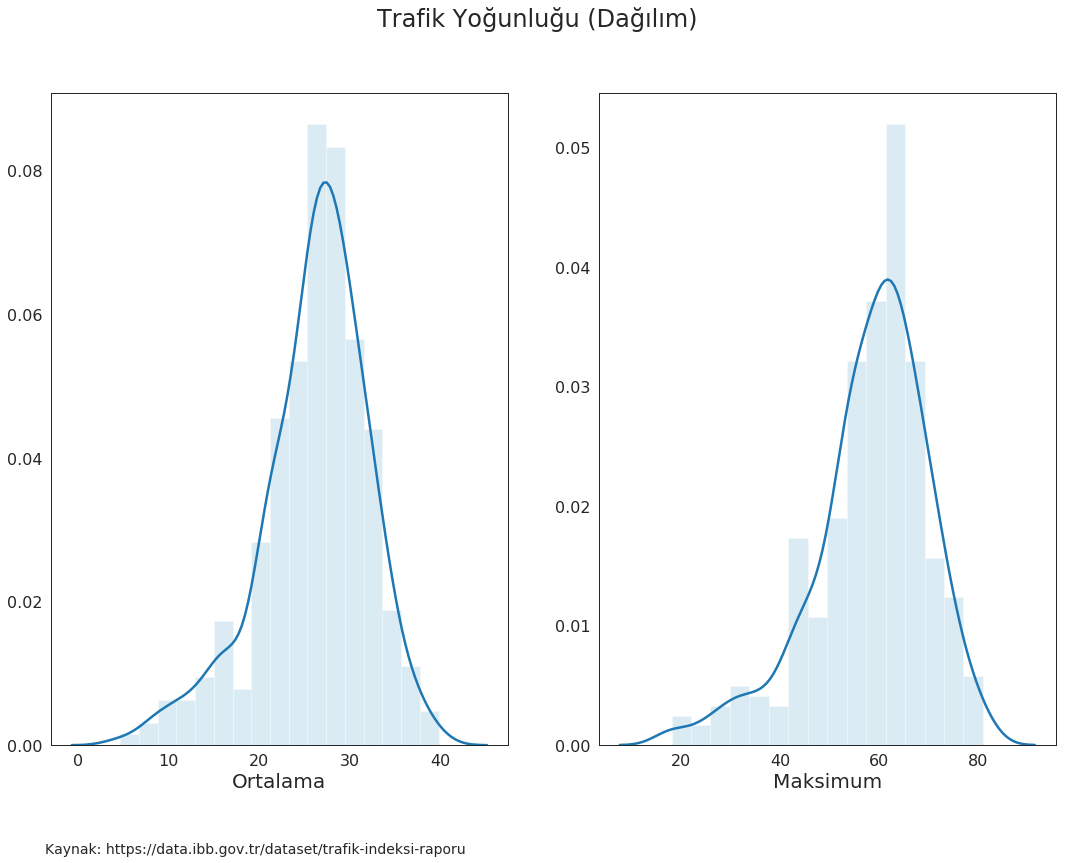

In [550]:
title = 'Trafik Yoğunluğu (Dağılım)'
# Ortalama ve maks dağılımları
sns.set(context='paper', style='white')
# Line ve scatter
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 12))

p = sns.distplot(by_ay_gun["mean"].dropna(), 
             hist=True, 
             kde=True, 
             color=paired_pal[0], 
             kde_kws={'color': paired_pal[1], 'lw': 2.5},
             ax=ax[0])
p.set_xlabel("Ortalama",fontsize=20)
p.tick_params(labelsize=16)

g = sns.distplot(by_ay_gun["max"].dropna(), 
             hist=True, 
             kde=True, 
             color=paired_pal[0], 
             kde_kws={'color': paired_pal[1], 'lw': 2.5},
             ax=ax[1])
g.set_xlabel("Maksimum",fontsize=20)
g.tick_params(labelsize=16)

f.suptitle(title, fontsize=24)
# Notumuz.
f.text(0.12, -0.003, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

In [551]:
# Tüm günler bazında
by_ay_gun.describe()

Ayın Günü        mean         max
count  308.000000  308.000000  308.000000
mean    15.461039   26.094958   58.305195
std      8.664303    5.920221   11.723652
min      1.000000    4.689895   18.000000
25%      8.000000   22.974739   53.000000
50%     15.000000   26.742705   60.000000
75%     23.000000   30.093531   67.000000
max     31.000000   39.795139   81.000000

In [552]:
# En kötü ortalamalı 5 gün
by_ay_gun.sort_values(by='mean', ascending=False).head(5)

Ay  Ayın Günü  Resmi Tatil  Okul Tatili  Haftasonu       mean   max
280  Aralık          4        False        False      False  39.795139  69.0
302  Aralık         26        False        False      False  38.686411  74.0
247   Kasım          1        False        False      False  37.773519  71.0
205   Eylül         20        False        False      False  37.625000  80.0
303  Aralık         27        False        False      False  36.940972  78.0

In [553]:
# En kötü trafiğin görüldüğü 5 gün
by_ay_gun.sort_values(by='max', ascending=False).head(5)

Ay  Ayın Günü  Resmi Tatil  Okul Tatili  Haftasonu       mean   max
174  Haziran         29        False         True       True  26.414634  81.0
30      Ocak         31        False         True      False  34.142857  81.0
246     Ekim         31        False        False      False  32.742160  80.0
287   Aralık         11        False        False      False  32.611111  80.0
205    Eylül         20        False        False      False  37.625000  80.0

In [554]:
# Heatmape eklenecek yazıların ne kadar sağa sola kayacağıyla ilgili değerler.
FONTSIZE = 16
MAX_XOFFSET = 0.05
MAX_YOFFSET = -0.7 + 1

HS_XOFFSET = 0.8
HS_YOFFSET = -0.8 + 1
HS_COLOR = 'cornflowerblue'

RESMI_XOFFSET = 0.8
RESMI_YOFFSET = -0.4 + 1
RESMI_COLOR = 'gold'

OKUL_YOFFSET1 = -0.15 + 1
OKUL_YOFFSET2 = 0 + 1
OKUL_XOFFSET1 = 0
OKUL_XOFFSET2 = 1
OKUL_UNIT = 1/31
OKUL_COLOR = 'orange'

BLACKCIRCLE = "\N{BLACK CIRCLE}"
BLACKLINE = "\N{BLACK RECTANGLE}"

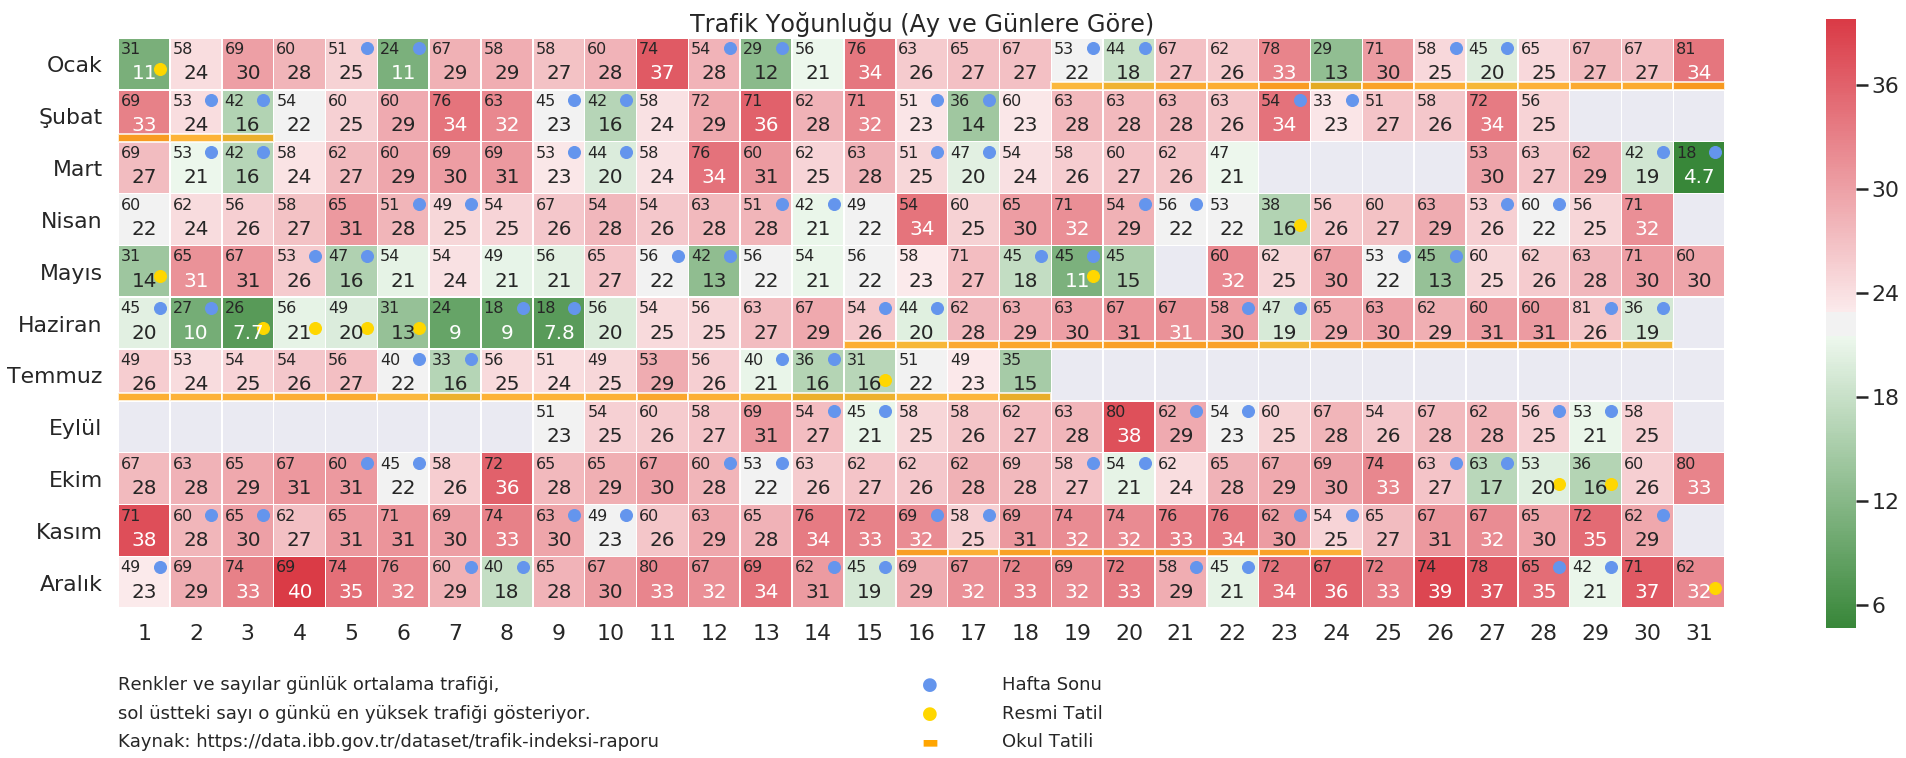

In [555]:
title = 'Trafik Yoğunluğu (Ay ve Günlere Göre)'
sns.set(context='poster')
f, ax = plt.subplots(figsize=(36, 32))
# Heatmap
p = sns.heatmap(by_ay_gun_flat_mean, 
            annot=True,
            annot_kws={"fontsize": 20, "va": "top"}, #top aslında aşağı doğru kaydırıyor.
            linewidths=0.5, 
            cmap=hm_pal, 
            square=True, 
            cbar=True,
            cbar_kws={"shrink": .35},
            ax=ax)
# Ekstraları ekleyelim.
for row, m in enumerate(by_ay_gun_flat_max.values):
    for col, d in enumerate(m):
        if not (np.isnan(d)):  # Veri yoksa ekstra bilgi koymayalım.
            # Günlük maksimum değer sol üste
            ax.annotate(f"{d:.0f}", (col + MAX_XOFFSET, row + MAX_YOFFSET), fontsize=FONTSIZE)
            # Haftasonuysa sağ yukarı bir "o"
            if by_ay_gun_flat_haftasonu.values[row][col]:
                ax.plot(col + HS_XOFFSET, row + HS_YOFFSET, color=HS_COLOR, marker='o')
            # Resmi tatilse sağ ortaya bir "o"
            if by_ay_gun_flat_resmi.values[row][col]:
                ax.plot(col + RESMI_XOFFSET, row + RESMI_YOFFSET, color=RESMI_COLOR, marker='o')
            # Okul tatiliyse alt tarafa bir dikdörtgen.
            if by_ay_gun_flat_okul.values[row][col]:
                ax.axhspan(row + OKUL_YOFFSET1, 
                           row + OKUL_YOFFSET2,
                           xmin=OKUL_UNIT * (col + OKUL_XOFFSET1),
                           xmax=OKUL_UNIT * (col + OKUL_XOFFSET2),
                           facecolor=OKUL_COLOR,
                           alpha=0.75)

# Başlık
p.set_title(title, fontsize=24)

leftx = plt.xlim()[0]
leftx2 = plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) / 2
leftx3 = plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) / 2 + + (plt.xlim()[1] - plt.xlim()[0]) * 0.05
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.15)
bottomy2 = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.20)
bottomy3 = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.25)

# Notlar
p.text(leftx, bottomy, "Renkler ve sayılar günlük ortalama trafiği,", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
p.text(leftx, bottomy2, "sol üstteki sayı o günkü en yüksek trafiği gösteriyor.", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
p.text(leftx, bottomy3, KAYNAK, 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# Takvimdeki diğer anahtarları yazalım.
p.annotate(BLACKCIRCLE, xy=(0, 0), xytext=(leftx2, bottomy), color=HS_COLOR, fontsize = 18, verticalalignment='bottom')
p.text(leftx3, bottomy, "Hafta Sonu", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
p.annotate(BLACKCIRCLE, xy=(0, 0), xytext=(leftx2, bottomy2), color=RESMI_COLOR, fontsize = 18, verticalalignment='bottom')
p.text(leftx3, bottomy2, "Resmi Tatil", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
p.annotate(BLACKLINE, xy=(0, 0), xytext=(leftx2,bottomy3), color=OKUL_COLOR, fontsize = 18, verticalalignment='bottom')
p.text(leftx3, bottomy3, "Okul Tatili", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# Ay ve gün demeye gerek yok boşu boşuna. Temizleyelim.
p.set(xlabel="", ylabel="")

all_figures[title] = f
plt.show()

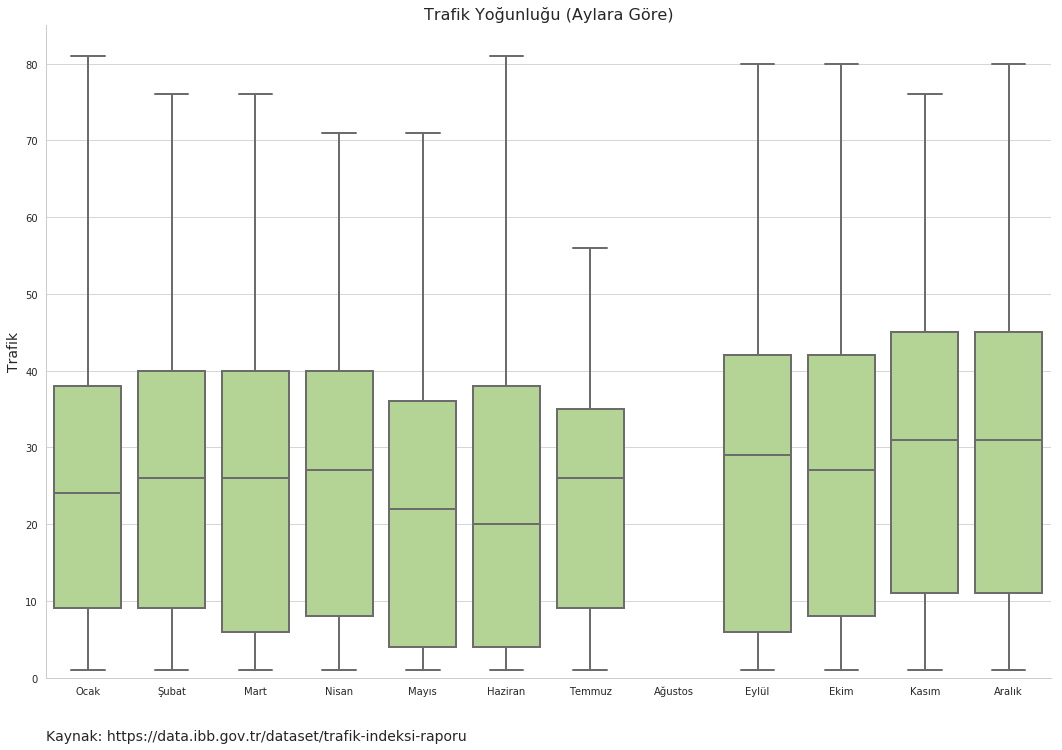

In [556]:
title = 'Trafik Yoğunluğu (Aylara Göre)'
# Ayların içindeki dağılıma bakalım
sns.set(context='paper', style='whitegrid')
# Boxplot
f, ax = plt.subplots(figsize=(18, 12))
p = sns.boxplot(data=df, 
            x="Ay", 
            y="Trafik", 
            color=paired_pal[2], 
            linewidth=2,
            ax=ax)
# Başlık
p.set_title(title, fontsize=16)

# Aylar zaten bu aksın ne anlama geldiğini gösteriyor.
p.set(xlabel="")

# Y aksını yazalım
p.set_ylabel("Trafik",fontsize=14)

# Akslardaki yazıların boyu
p.tick_params(labelsize=10)

# Maks değer 81, 85'e kadar göstersek yeter.
plt.ylim(0, 85)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

# Üst ve sağdaki çerçeveyi kaldıralım.
sns.despine()

all_figures[title] = f
plt.show()

In [557]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = f'{(n*100):.0f}. Kantil'
    return percentile_

In [558]:
df_ay = df.groupby(['Ay'])["Trafik"].agg(["mean", "max", "min", "median", "std", percentile(.25), percentile(.75)])
df_ay

mean   max  min  median        std  25. Kantil  75. Kantil
Ay                                                                      
Ocak     25.587357  81.0  1.0    24.0  18.103894         9.0        38.0
Şubat    26.600398  76.0  1.0    26.0  17.882722         9.0        40.0
Mart     24.780998  76.0  1.0    26.0  18.659537         6.0        40.0
Nisan    26.017552  71.0  1.0    27.0  17.751961         8.0        40.0
Mayıs    22.820428  71.0  1.0    22.0  18.024812         4.0        36.0
Haziran  22.757448  81.0  1.0    20.0  17.857419         4.0        38.0
Temmuz   23.025841  56.0  1.0    26.0  14.641085         9.0        35.0
Ağustos        NaN   NaN  NaN     NaN        NaN         NaN         NaN
Eylül    26.498176  80.0  1.0    29.0  18.854179         6.0        42.0
Ekim     26.798295  80.0  1.0    27.0  19.262072         8.0        42.0
Kasım    30.309482  76.0  1.0    31.0  19.240169        11.0        45.0
Aralık   30.892396  80.0  1.0    31.0  19.576070        11.0        45.0

In [559]:
# En kötü ortalma trfaik
df_ay.sort_values(by='mean', ascending=False)

mean   max  min  median        std  25. Kantil  75. Kantil
Ay                                                                      
Aralık   30.892396  80.0  1.0    31.0  19.576070        11.0        45.0
Kasım    30.309482  76.0  1.0    31.0  19.240169        11.0        45.0
Ekim     26.798295  80.0  1.0    27.0  19.262072         8.0        42.0
Şubat    26.600398  76.0  1.0    26.0  17.882722         9.0        40.0
Eylül    26.498176  80.0  1.0    29.0  18.854179         6.0        42.0
Nisan    26.017552  71.0  1.0    27.0  17.751961         8.0        40.0
Ocak     25.587357  81.0  1.0    24.0  18.103894         9.0        38.0
Mart     24.780998  76.0  1.0    26.0  18.659537         6.0        40.0
Temmuz   23.025841  56.0  1.0    26.0  14.641085         9.0        35.0
Mayıs    22.820428  71.0  1.0    22.0  18.024812         4.0        36.0
Haziran  22.757448  81.0  1.0    20.0  17.857419         4.0        38.0
Ağustos        NaN   NaN  NaN     NaN        NaN         NaN         NaN

In [560]:
# Haftanın günü ve saat bazında bakalım.
by_gun_saat = df.groupby(["Gün", "Tam Saat"])["Trafik"].agg(
    ["mean", "max", "min", "median", "std", percentile(.25), percentile(.75)])
by_gun_saat = by_gun_saat.reset_index()
by_gun_saat_flat = by_gun_saat.pivot("Gün", "Tam Saat", "mean")
by_gun_saat_flat = by_gun_saat_flat.sort_index()

In [561]:
# En kötü ortalama trfaik
by_gun_saat.sort_values(by='mean', ascending=False).head(10)

Gün  Tam Saat       mean   max   min  median        std  \
114       Cuma        18  63.921875  80.0   2.0    65.0  10.674775   
90    Perşembe        18  61.101190  81.0   2.0    62.0  10.681903   
66    Çarşamba        18  58.712644  80.0   2.0    58.0  10.053494   
115       Cuma        19  58.487329  76.0  11.0    60.0  10.222349   
113       Cuma        17  58.389864  74.0   2.0    60.0  10.108979   
42        Salı        18  57.775665  76.0   2.0    60.0  11.212878   
89    Perşembe        17  54.570588  76.0   2.0    54.0   9.601179   
18   Pazartesi        18  54.402390  72.0   2.0    56.0  12.137167   
91    Perşembe        19  53.058594  80.0   2.0    54.0  11.241195   
65    Çarşamba        17  52.028302  76.0   2.0    53.0   9.007724   

     25. Kantil  75. Kantil  
114        62.0        69.0  
90         56.0        67.0  
66         54.0        65.0  
115        54.0        65.0  
113        56.0        63.0  
42         53.0        65.0  
89         49.0        60.0  
18         53.0        61.5  
91         47.0        60.0  
65         47.0        56.0

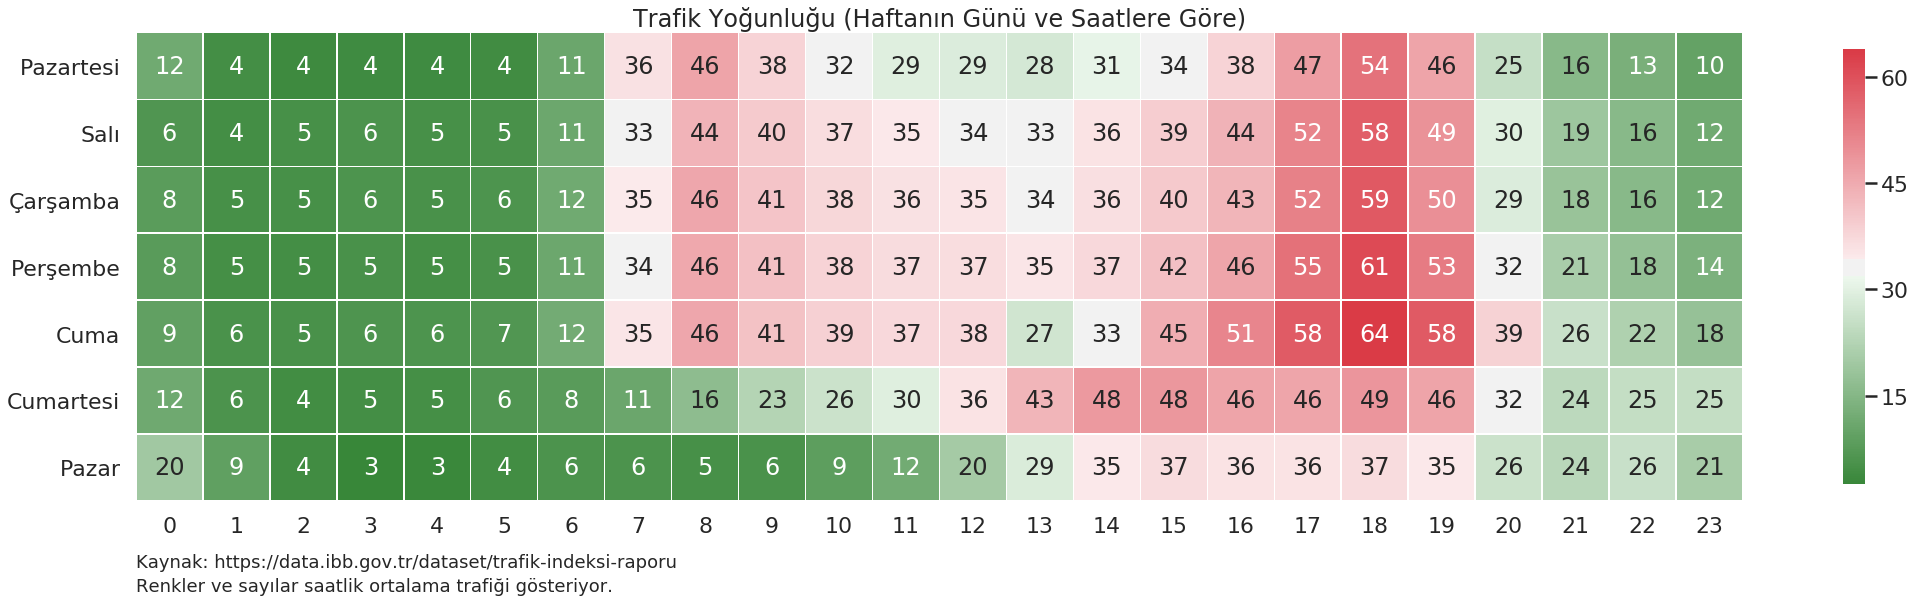

In [562]:
title = 'Trafik Yoğunluğu (Haftanın Günü ve Saatlere Göre)'
sns.set(context='poster')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))
p = sns.heatmap(by_gun_saat_flat, 
            annot=True, 
            linewidths=.5, 
            cmap=hm_pal, 
            square=True,
            cbar=True,
            cbar_kws={"shrink": .25},
            fmt='.0f',
            ax=ax)
# Başlık
p.set_title(title, fontsize=24)



leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.15)
bottomy2 = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.20)

# Notlar
p.text(leftx, bottomy2, "Renkler ve sayılar saatlik ortalama trafiği gösteriyor.", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# Ay ve gün demeye gerek yok boşu boşuna. Temizleyelim.
p.set(xlabel="", ylabel="")

all_figures[title] = f
plt.show()

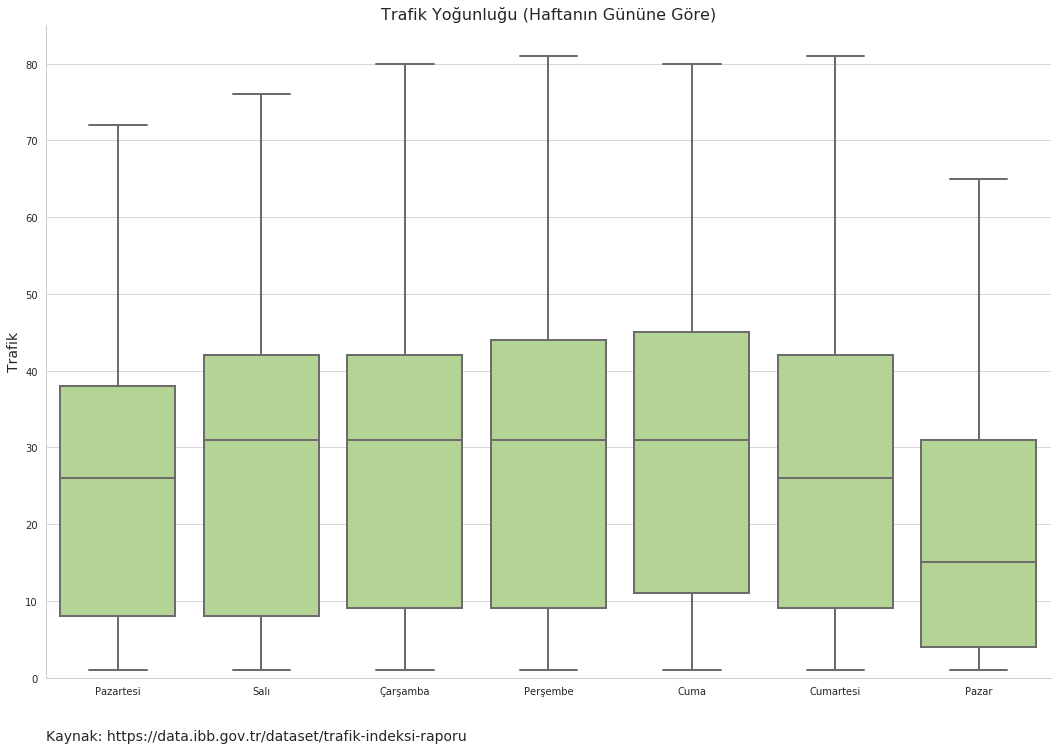

In [563]:
title = 'Trafik Yoğunluğu (Haftanın Gününe Göre)'
# Haftanın gününe göre tüm günlerdeki dağılıma bakalım
sns.set(context='paper', style='whitegrid')
# Boxplot
f, ax = plt.subplots(figsize=(18, 12))
p = sns.boxplot(data=df, 
            x="Gün", 
            y="Trafik", 
            color=paired_pal[2], 
            linewidth=2,
            ax=ax)

# Başlık
p.set_title(title, fontsize=16)

# Aylar zaten bu aksın ne anlama geldiğini gösteriyor.
p.set(xlabel="")

# Y aksını yazalım
p.set_ylabel("Trafik",fontsize=14)

# Akslardaki yazıların boyu
p.tick_params(labelsize=10)

# Maks değer 81, 85'e kadar göstersek yeter.
plt.ylim(0, 85)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

# Üst ve sağdaki çerçeveyi kaldıralım.
sns.despine()

all_figures[title] = f
plt.show()

In [564]:
df_gun = df.groupby(['Gün'])["Trafik"].agg(
    ["mean", "max", "min", "median", "std", percentile(.25), percentile(.75)])
df_gun.sort_values(by='mean', ascending=False)

mean   max  min  median        std  25. Kantil  75. Kantil
Gün                                                                       
Cuma       30.199984  80.0  1.0    31.0  19.794647        11.0        45.0
Perşembe   28.563246  81.0  1.0    31.0  19.182655         9.0        44.0
Çarşamba   27.874424  80.0  1.0    31.0  18.539999         9.0        42.0
Salı       27.255957  76.0  1.0    31.0  18.852515         8.0        42.0
Cumartesi  25.890636  81.0  1.0    26.0  17.649294         9.0        42.0
Pazartesi  24.747522  72.0  1.0    26.0  17.636478         8.0        38.0
Pazar      18.519585  65.0  1.0    15.0  15.258901         4.0        31.0

In [565]:
# Günlük veriyi ortalama ve maksimum olarak alalım,
df_dailies = df.groupby('Tarih')['Trafik'].agg(['mean', 'max'])
# Veri olmayan yerler karışmasın diye yılın tüm günlerini ekleyelim.
# Veri olmayan yerlerde np.nan olsun böylece
df_dailies = df_dailies.reindex(emptyyear)
df_dailies.columns = ['Günlük Ortalama', 'Günlük Maks.']
# Tidy formattan long formata çevirelim. Tam normalize delim yani veriyi.
df_dailies_long = df_dailies.unstack().reset_index()
# Kolon adları saçma oldu, düzeltelim.
df_dailies_long.columns = ['Category', 'Date', 'Value']
# Kolonları da tekrar sıralayalım. Grafik için kolaylık olsun.
df_dailies_long = df_dailies_long[['Date', 'Value', 'Category']]

# Günlük veri çok değişken, 7 günlük ortalamarı da ekleyelim.
df_dailies_rolling = df_dailies.rolling(7).mean()
df_dailies_rolling.columns = ['7 Günlük Ortalama', '7 Günlük Ort. Maks.']
# 7 Günlük ortalamaları da tidyden long formata çevirelim.
df_dailies_rolling_long = df_dailies_rolling.unstack().reset_index()
df_dailies_rolling_long.columns = ['Category', 'Date', 'Value']
df_dailies_rolling_long = df_dailies_rolling_long[['Date', 'Value', 'Category']]

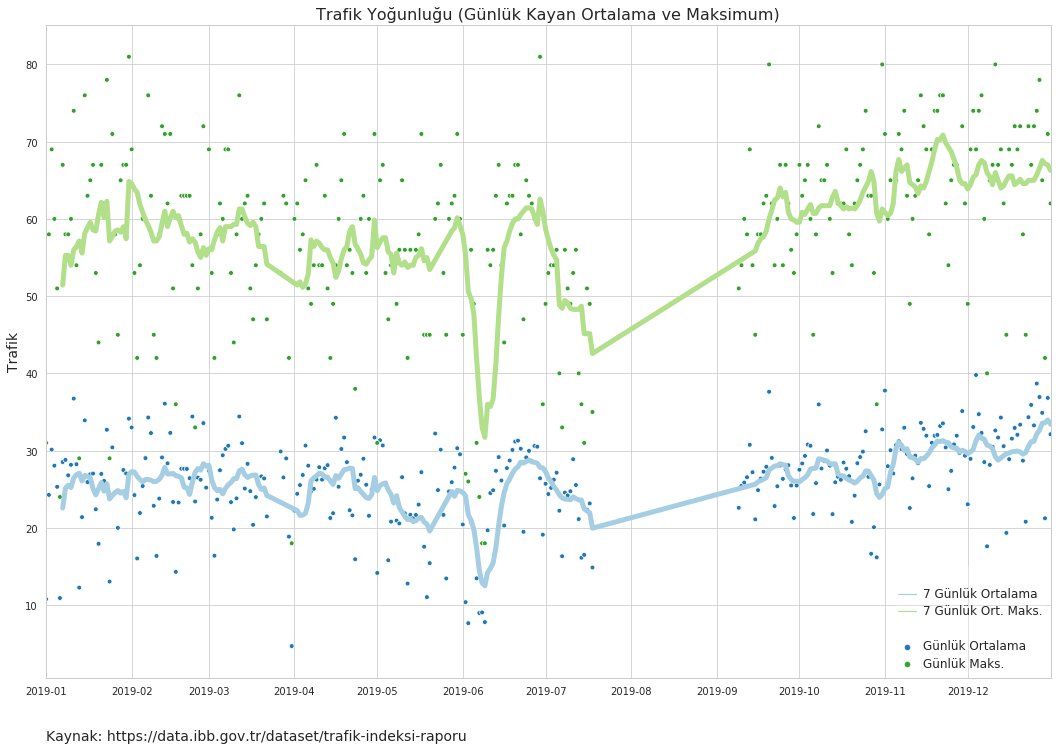

In [566]:
title = 'Trafik Yoğunluğu (Günlük Kayan Ortalama ve Maksimum)'
# Günlük ve 7 günlük rolling ortalama ve maks
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Önce 7 günlüklerden bir linegraph yapalım
p = sns.lineplot(data=df_dailies_rolling_long, 
                 x='Date', 
                 y='Value', 
                 hue='Category', 
                 palette=[paired_pal[0], paired_pal[2]],
                 markers=False,
                 lw=5,
                 ax=ax)

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.scatterplot(data=df_dailies_long, 
                    x='Date', 
                    y='Value', 
                    hue='Category', 
                    markers="o", 
                    palette=[paired_pal[1], paired_pal[3]], 
                    ax=ax)

# Nedense seaborn ısrarla tarihleri 2010'dan başlatıyor. Garanti olsun diye x aksınının sınırlarını belirtelim.
plt.xlim(emptyyear[0], emptyyear[-1])

# Başlık
p.set_title(title, fontsize=16)

# Aylar var, aks ismine gerek yok.
p.set(xlabel="")

# Y aksını isimlendirelim
p.set_ylabel("Trafik",fontsize=14)

# Aks değerlerinini font büyüklüğü.
p.tick_params(labelsize=10)

# Notumuzu ekleyelim.
# Notu ekleyeceğimiz yer grafiğin koordinat sisteminde olduğunda x değeri için bir tarih veriyoruz.
# Çünkü x aksı bir tarih aksı.
leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

# Legend yazarken değişkenlerin başına "Category" yazıyor. Hoş değil. Temizleyelim.
leg = ax.get_legend()
for t in leg.texts:
    if t.get_text() == "Category":
        t.set_text("")
    t.set_fontsize(12) # Diğer satırların da font büyüklüğünü ayarlayalım.

# Legend çerçevesini kaldırıp kendini de yarı transparan yapalım.
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.25)

all_figures[title] = f
plt.show()

In [567]:
# Günü vakitlere bölelim. 
# Vakitten daha iyi bir şey bulsaydık iyiydi buna.
day_periods = {
                '7': 'Sabah Yoğunluğu 07:00-09:59',
                '8': 'Sabah Yoğunluğu 07:00-09:59',
                '9': 'Sabah Yoğunluğu 07:00-09:59',
                '10': 'Öğleden Önce 10:00-12:59',
                '11': 'Öğleden Önce 10:00-12:59',
                '12': 'Öğleden Önce 10:00-12:59',
                '13': 'Öğlen 13:00-14:59',
                '14': 'Öğlen 13:00-14:59',
                '15': 'Öğleden Sonra 15:00-16:59',
                '16': 'Öğleden Sonra 15:00-16:59',
                '17': 'Akşam Yoğunluğu 17:00-19:59',
                '18': 'Akşam Yoğunluğu 17:00-19:59',
                '19': 'Akşam Yoğunluğu 17:00-19:59',
                '20': 'Gece 20:00-22:59',
                '21': 'Gece 20:00-22:59',
                '22': 'Gece 20:00-22:59',
                '23': 'Gece Yarısı 23:00-01:59',
                '0': 'Gece Yarısı 23:00-01:59',
                '1': 'Gece Yarısı 23:00-01:59',
                '2': 'Sabaha Karşı 02:00-04:59',
                '3': 'Sabaha Karşı 02:00-04:59',
                '4': 'Sabaha Karşı 02:00-04:59',
                '5': 'Sabah 05:00-06:59',
                '6': 'Sabah 05:00-06:59',
              }

In [568]:
# Veriye bir vakit kolonu ekleyelim. 
df['Vakit'] = df.apply(lambda tr: day_periods[str(tr['Tam Saat'])], axis=1)

# Tarih ve vakitlerden oluşan bir pivot yapalım.
df_vakit = df.groupby(['Tarih', 'Vakit'])['Trafik'].mean().unstack()

# Günlük değerleri de ekleyelim.
# Ama pandas kolon isimleri kategori olunca kabul etmiyor, tekrar normale döndürüyoruz.
# Nasıl olsa işimizi gördü.
df_vakit = pd.merge(df_vakit, df_dailies, how='left', left_index=True, right_index=True)

# Bu veriyi analzide kullanacağız np.nan olan satırları çıkartalım.
df_vakit.dropna(inplace=True)

In [569]:
df_vakit_solo = df.groupby(['Vakit'])["Trafik"].agg(
    ["mean", "max", "min", "median", "std", percentile(.25), percentile(.75)])
df_vakit_solo.sort_values(by='mean', ascending=False)

mean   max  min  median        std  \
Vakit                                                                  
Akşam Yoğunluğu 17:00-19:59  50.708569  81.0  2.0    53.0  13.396531   
Öğleden Sonra 15:00-16:59    42.193861  81.0  2.0    42.0   9.578073   
Öğlen 13:00-14:59            34.695167  65.0  2.0    35.0   9.343200   
Sabah Yoğunluğu 07:00-09:59  31.925347  72.0  1.0    36.0  17.229786   
Öğleden Önce 10:00-12:59     31.622565  62.0  1.0    35.0  10.988502   
Gece 20:00-22:59             23.582629  63.0  1.0    22.0  10.543349   
Gece Yarısı 23:00-01:59      10.648844  47.0  1.0     9.0   7.919841   
Sabah 05:00-06:59             7.751926  36.0  1.0     6.0   6.140748   
Sabaha Karşı 02:00-04:59      4.714863  42.0  1.0     4.0   3.921123   

                             25. Kantil  75. Kantil  
Vakit                                                
Akşam Yoğunluğu 17:00-19:59        44.0        60.0  
Öğleden Sonra 15:00-16:59          36.0        49.0  
Öğlen 13:00-14:59                  29.0        40.0  
Sabah Yoğunluğu 07:00-09:59        17.0        45.0  
Öğleden Önce 10:00-12:59           27.0        38.0  
Gece 20:00-22:59                   17.0        31.0  
Gece Yarısı 23:00-01:59             4.0        15.0  
Sabah 05:00-06:59                   2.0        11.0  
Sabaha Karşı 02:00-04:59            2.0         6.0

In [570]:
# Bir korelasyon matrisi yapıp ne neyle ilişkili bakalım.
corr = df_vakit.corr()

# Bu matrisler hep simetrik olduğundan ikinci yarısını göstermeyelim.
# np.ones_like bize verdiğimiz array'in hepsini 1 olarak geri veriyor.
# dtype argümanı geri dönen arrayin 1'e benzer argümanlarının tipini belirtiyor.
# np.triu da verili bir arrayin üst tarafını (digonal ve üsütünü) koruyor, kalanı sıfır yapıyor.
# Dolayısıyla bu bize üst tarafı False olan, corr şeklinde bir array veriyor.
mask = np.triu(np.ones_like(corr, dtype=np.bool))

In [571]:
# Korelasyon matrisininin hem kolon hem sütularını sort edelim ki grafikler kolay okunsun.
cols = ["Sabah Yoğunluğu 07:00-09:59", 
        "Öğleden Önce 10:00-12:59", 
        "Öğlen 13:00-14:59", 
        "Öğleden Sonra 15:00-16:59", 
        "Akşam Yoğunluğu 17:00-19:59", 
        "Gece 20:00-22:59", 
        "Gece Yarısı 23:00-01:59", 
        "Sabaha Karşı 02:00-04:59", 
        "Sabah 05:00-06:59", 
        "Günlük Ortalama", 
        "Günlük Maks."]
corr = corr[cols]
corr.index = pd.Categorical(corr.index, 
        categories=[
            "Sabah Yoğunluğu 07:00-09:59", 
            "Öğleden Önce 10:00-12:59", 
            "Öğlen 13:00-14:59", 
            "Öğleden Sonra 15:00-16:59", 
            "Akşam Yoğunluğu 17:00-19:59", 
            "Gece 20:00-22:59", 
            "Gece Yarısı 23:00-01:59", 
            "Sabaha Karşı 02:00-04:59", 
            "Sabah 05:00-06:59", 
            "Günlük Ortalama", 
            "Günlük Maks."
        ],
        ordered=True)
corr.sort_index(inplace=True)

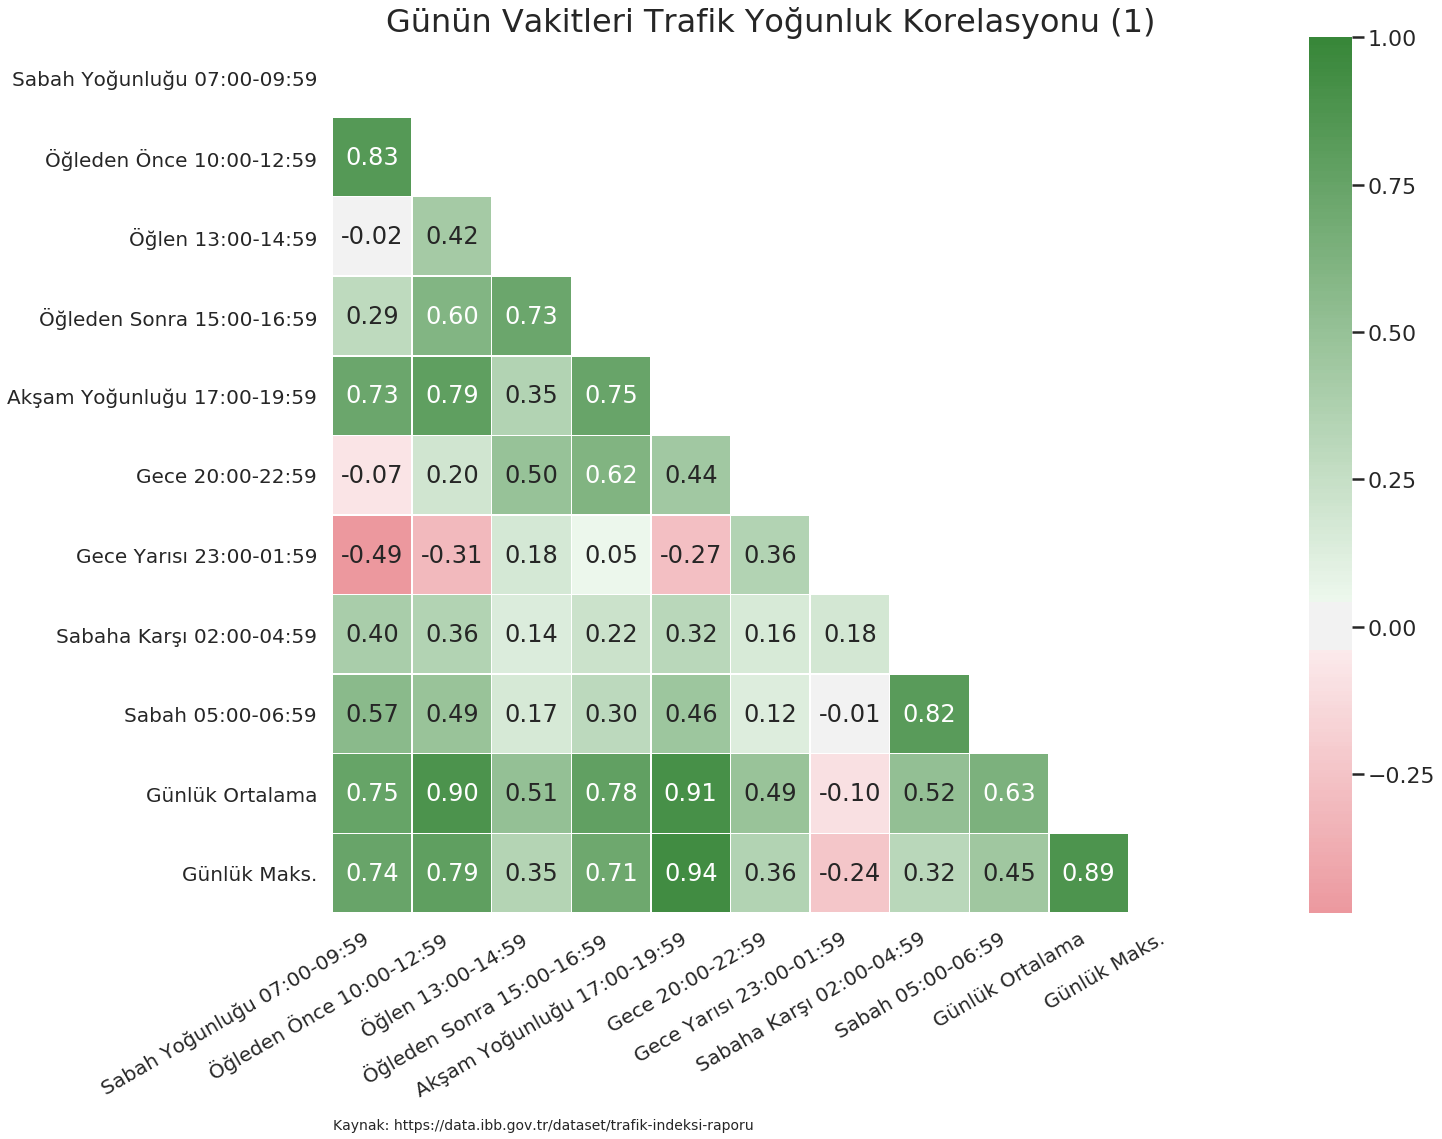

In [572]:
title = 'Günün Vakitleri Trafik Yoğunluk Korelasyonu (1)'
sns.set(context='poster',style='white')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))

# Heatmap. Ama renk paletimizi tersine çeviriyoruz (hm_pal.reversed()) çünkü pozitifler yeşil olsun istiyoruz.
p = sns.heatmap(corr, 
                cmap=hm_pal.reversed(), 
                center=0,
                square=True, 
                mask=mask, 
                linewidths=.5,
                annot=True, 
                fmt='.2f',
                cbar=True,
                cbar_kws={"shrink": 1},
                ax=ax)

# Başlık
p.set_title(title, fontsize=32)

# X aksındakşi yazıları çevirelim. Zor okunuyor.
f.autofmt_xdate(bottom=0.5, rotation=30, ha='right')

# Akslardaki yazıların boyu
p.tick_params(labelsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.25)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

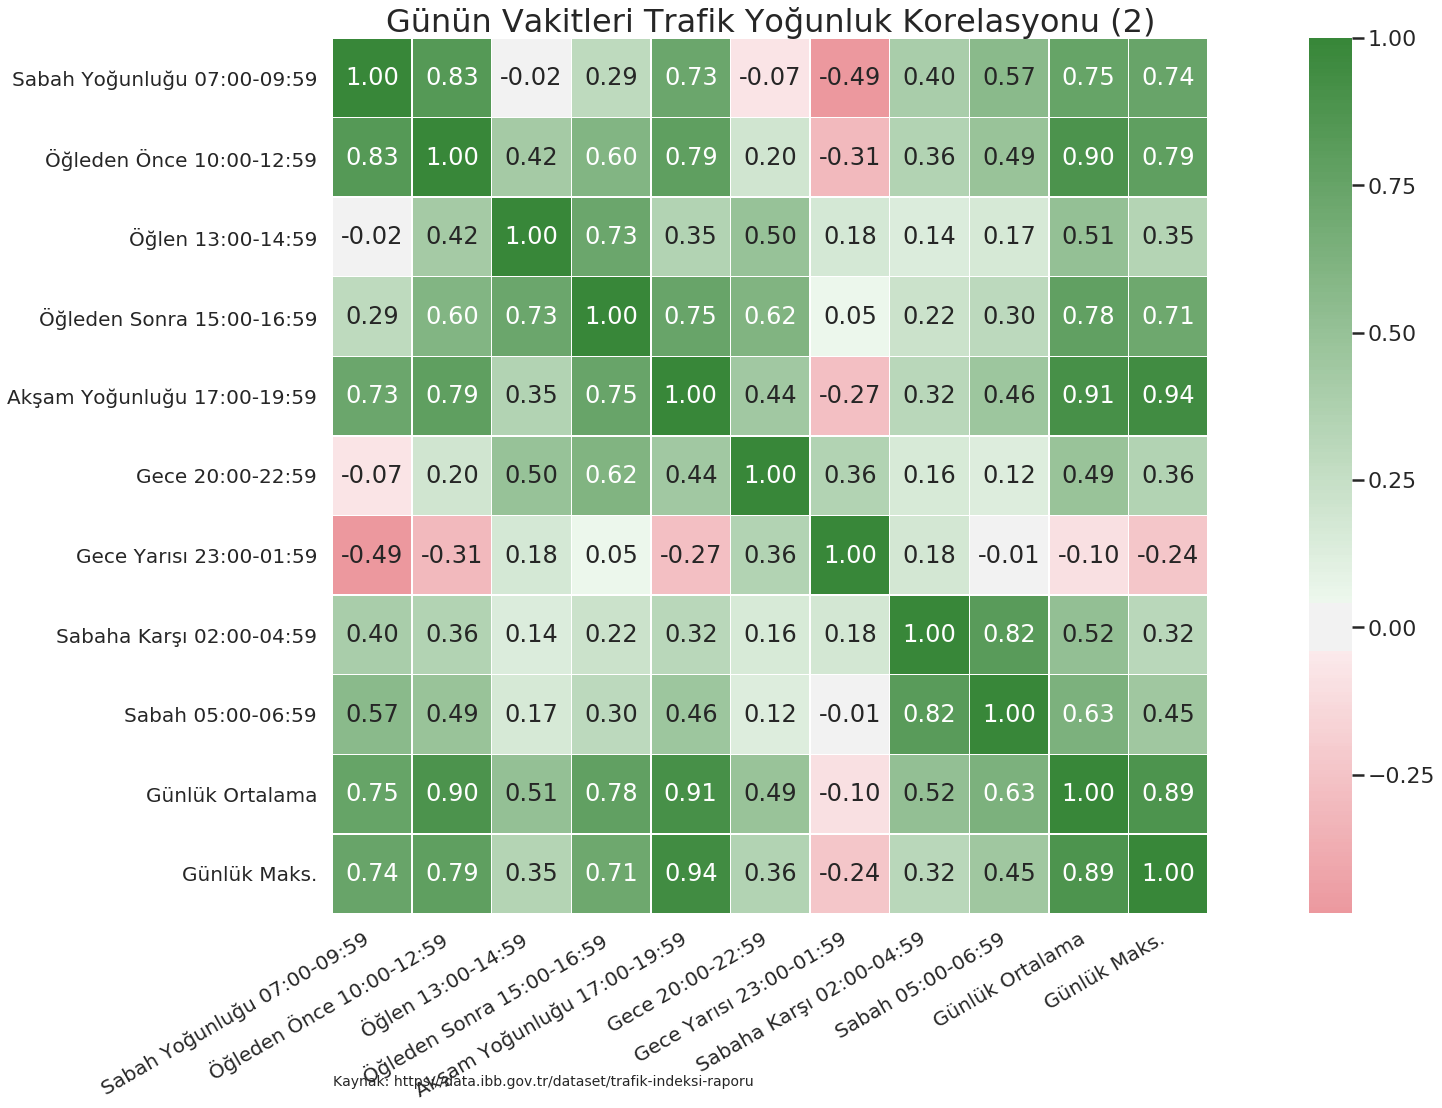

In [573]:
title = 'Günün Vakitleri Trafik Yoğunluk Korelasyonu (2)'
# Bu üçgen değil kare versiyonu.
sns.set(context='poster',style='white')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))

# Heatmap. Ama renk paletimizi tersine çeviriyoruz (hm_pal.reversed()) çünkü pozitifler yeşil olsun istiyoruz.
p = sns.heatmap(corr, 
                cmap=hm_pal.reversed(), 
                center=0,
                square=True, 
                linewidths=.5,
                annot=True, 
                fmt='.2f',
                cbar=True,
                cbar_kws={"shrink": 1},
                ax=ax)

# Başlık
p.set_title(title, fontsize=32)

# X aksındakşi yazıları çevirelim. Zor okunuyor.
f.autofmt_xdate(bottom=0.5, rotation=30, ha='right')

# Akslardaki yazıların boyu
p.tick_params(labelsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.2)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

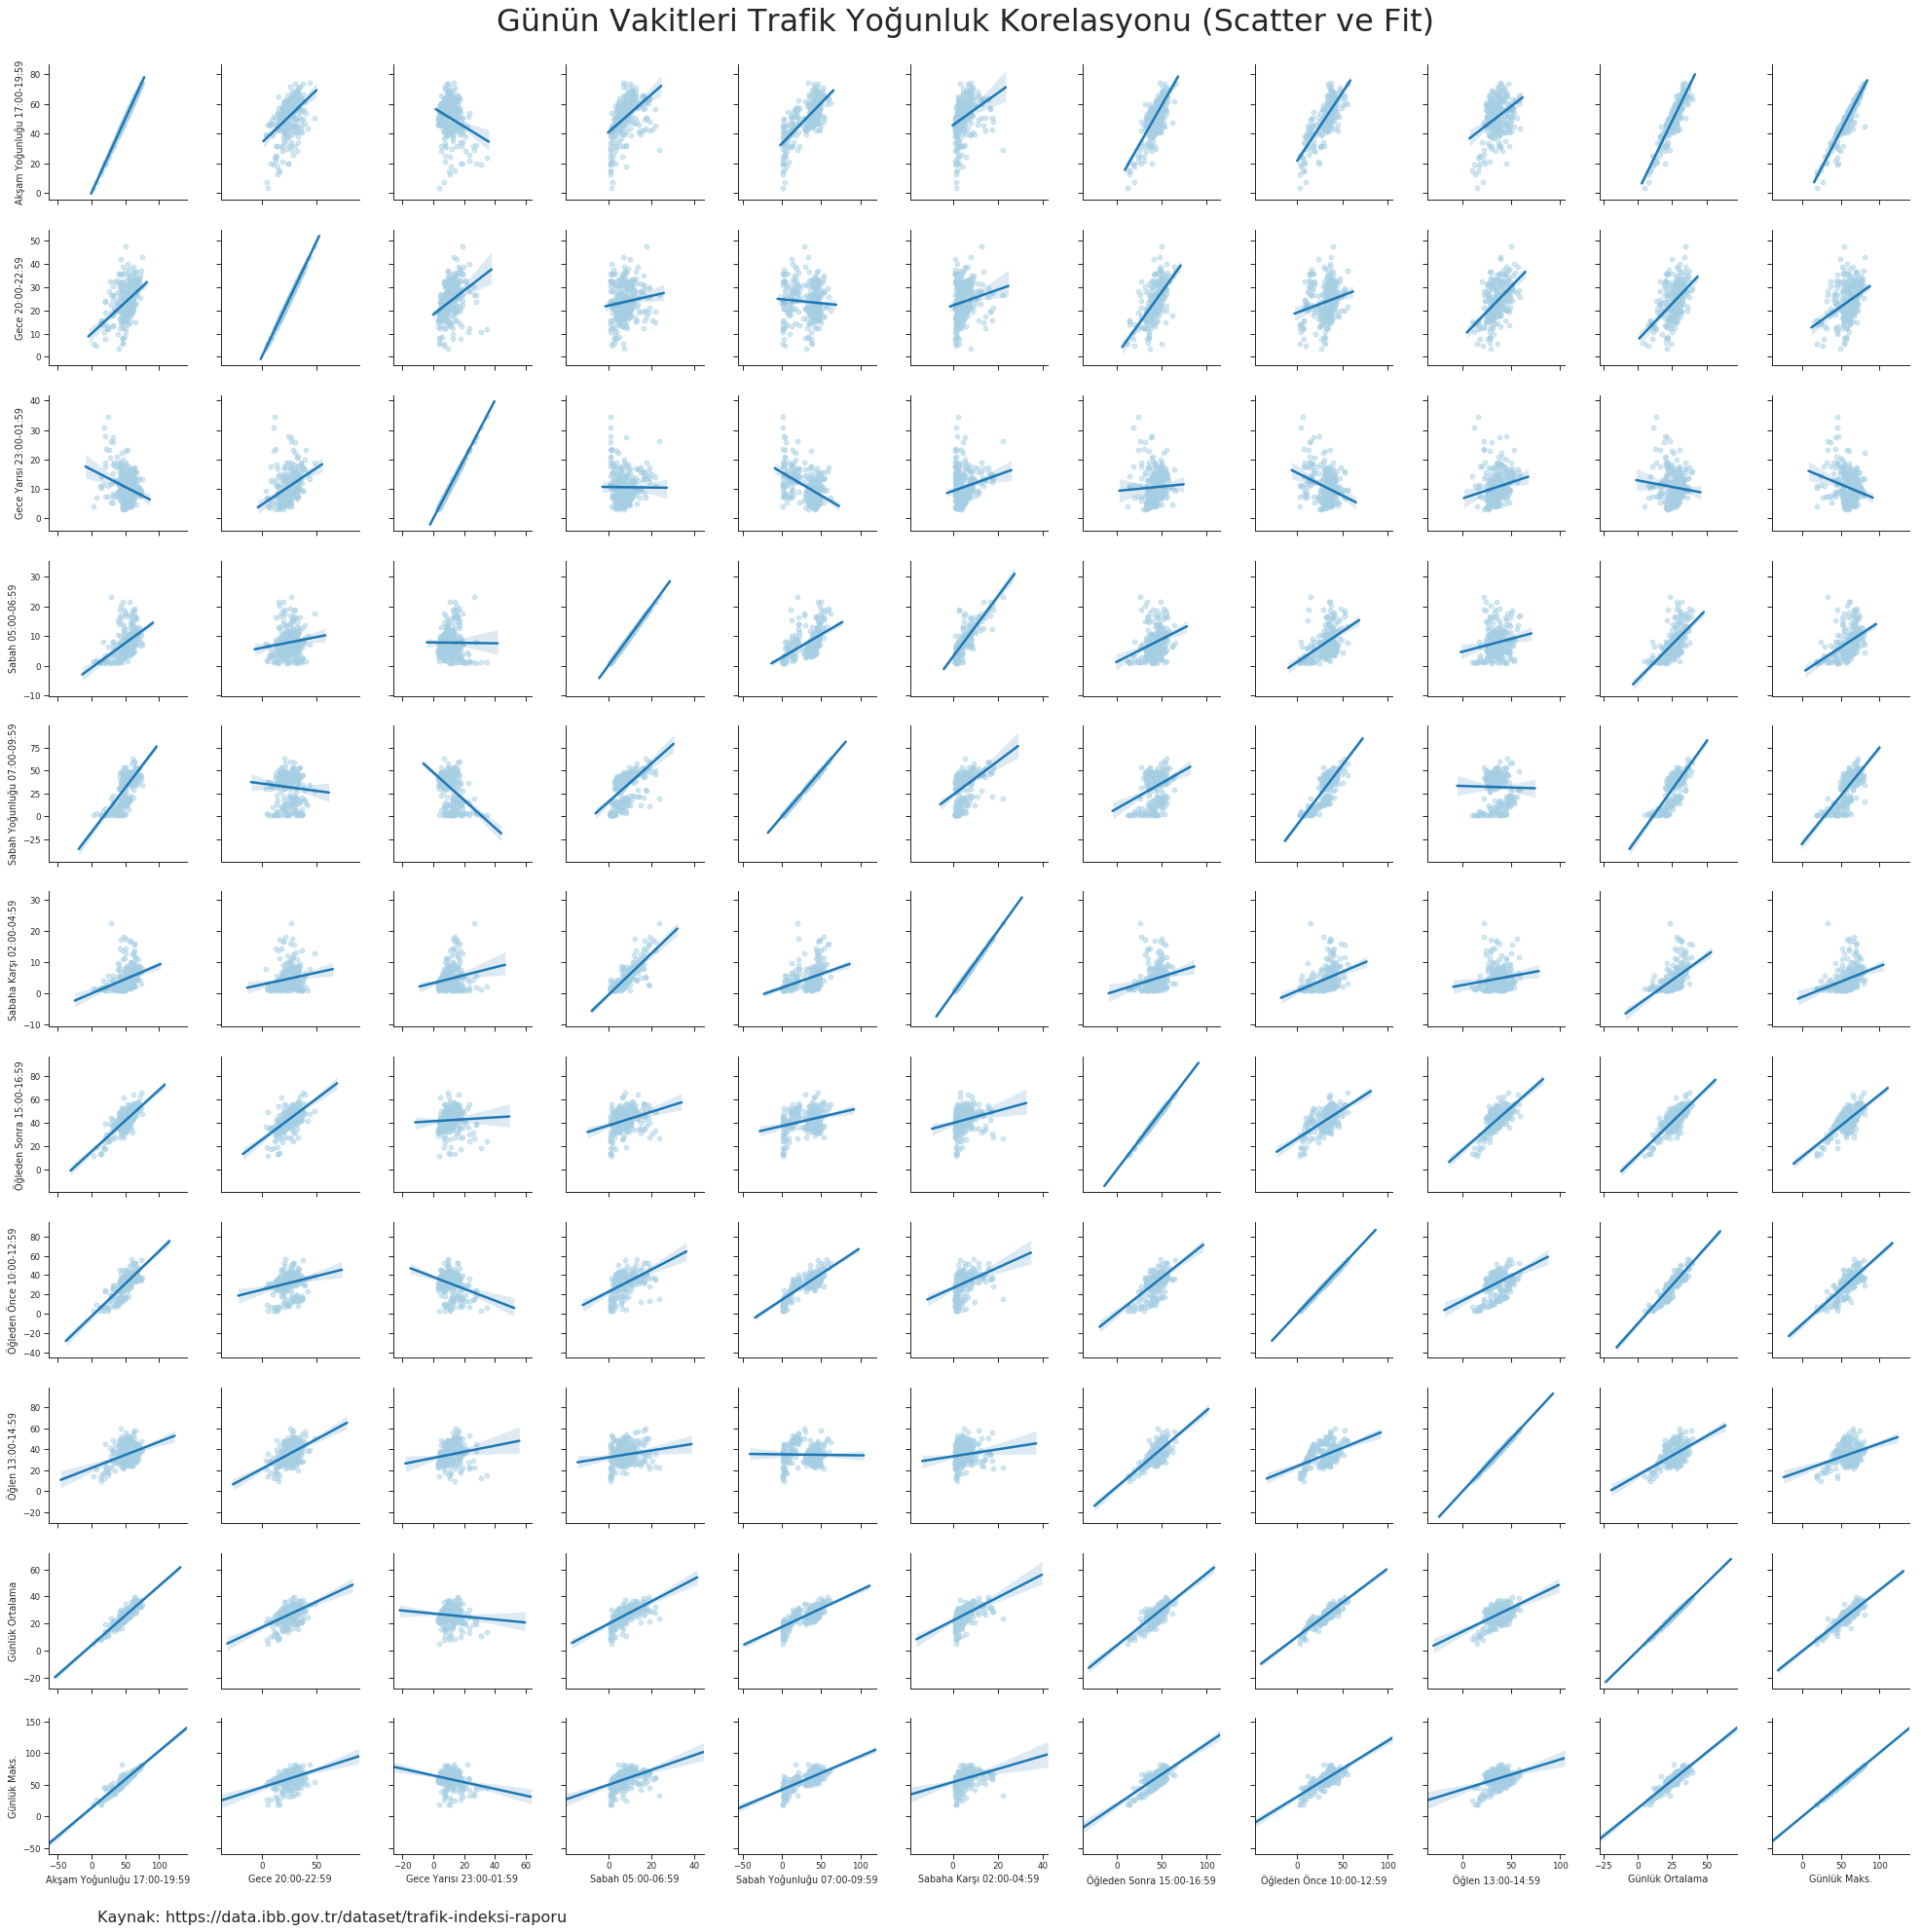

In [574]:
title = 'Günün Vakitleri Trafik Yoğunluk Korelasyonu (Scatter ve Fit)'
# Heatmap yerine korelasyonları ve straight line fitleri gösterelim.
sns.set(context='paper', style='ticks')
f = sns.PairGrid(df_vakit, despine=True)
f.map(sns.regplot, 
      line_kws={'color': paired_pal[1], 'lw': 2.5}, 
      scatter_kws={'color': paired_pal[0], 'alpha': .5})
f.fig.subplots_adjust(top=.95)
f.fig.suptitle(title, fontsize=32)
f.fig.text(0.05, -.015, "Kaynak: https://data.ibb.gov.tr/dataset/trafik-indeksi-raporu", 
       ha ='left', 
       fontsize = 16,
       verticalalignment='bottom')
all_figures[title] = f
plt.show()

In [575]:
# Aynı satırda hem bugünü hem dünü görelim.
df_vakit_next = df_vakit.copy()
# Yeni dataframein endeksini bir gün kaydıralım, diğer değerler aynı kalsın.
df_vakit_next.index = df_vakit_next.index.shift(1, freq='D')
# İkisini birlşetirelim ve sütun isimlerini Bugün ve Dün diyerek ayıralım birbirinden 
df_vakit_2day = pd.merge(df_vakit, df_vakit_next, how='left', left_index=True, right_index=True, 
                         suffixes=('_Bugün', '_Dün'))
# Yeni ortaya çıkan np.nan değeri olan satırları atalım.
df_vakit_2day.dropna(inplace=True)

In [576]:
# Kolonların hepsine ihtiyacımız yok. Saba, akşam, ortalama ve maksları alalım.
df_vakit_2day = df_vakit_2day[["Akşam Yoğunluğu 17:00-19:59_Bugün",
                              "Sabah Yoğunluğu 07:00-09:59_Bugün",
                              "Günlük Ortalama_Bugün",
                              "Günlük Maks._Bugün",
                              "Akşam Yoğunluğu 17:00-19:59_Dün",
                              "Sabah Yoğunluğu 07:00-09:59_Dün",
                              "Günlük Ortalama_Dün",
                              "Günlük Maks._Dün"]]
# Kolon isimlerini kısaltalım.
cols = ["Akşam Yoğunluğu Bugün",
          "Sabah Yoğunluğu Bugün",
          "Ortalama Bugün",
          "Maks. Bugün",
          "Akşam Yoğunluğu Dün",
          "Sabah Yoğunluğu Dün",
          "Ortalama Dün",
          "Maks. Dün"]
df_vakit_2day.columns = cols
# Bir korelasyon matrisi yapalım (default Spearman, bizim için yeterli)
corr = df_vakit_2day.corr()

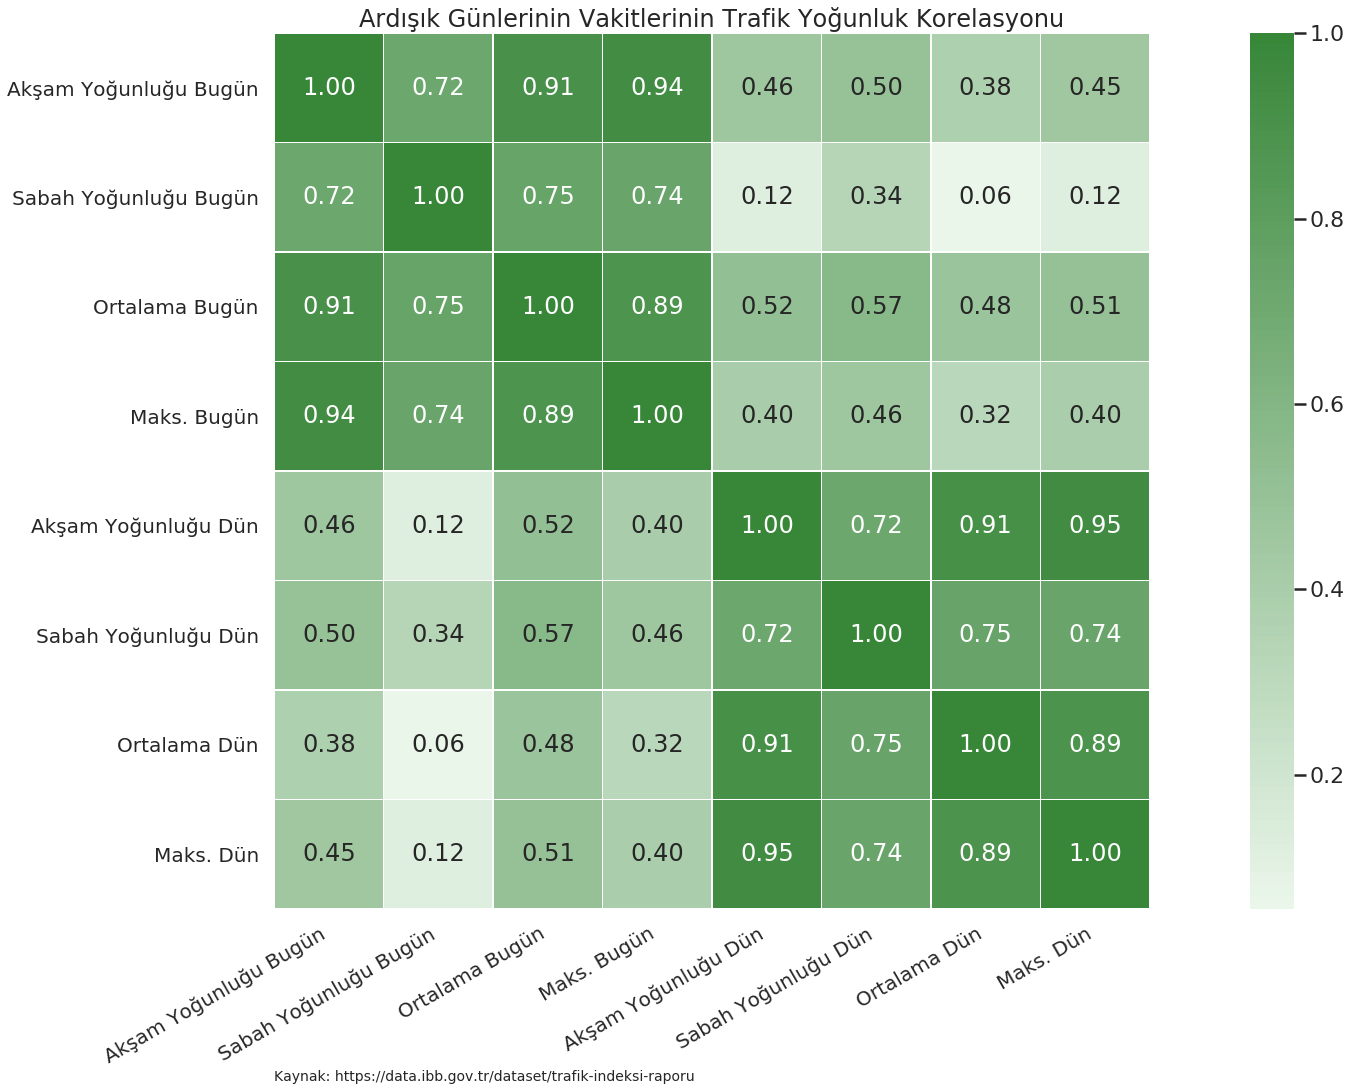

In [577]:
title = 'Ardışık Günlerinin Vakitlerinin Trafik Yoğunluk Korelasyonu'
# İki ardışık günün arasındaki korelasyonlar
sns.set(context='poster',style='white')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))

# Heatmap. Ama renk paletimizi tersine çeviriyoruz (hm_pal.reversed()) çünkü pozitifler yeşil olsun istiyoruz.
p = sns.heatmap(corr, 
                cmap=hm_pal.reversed(), 
                center=0,
                square=True, 
                linewidths=.5,
                annot=True, 
                fmt='.2f',
                cbar=True,
                cbar_kws={"shrink": 1},
                ax=ax)

# Başlık
p.set_title(title, fontsize=24)

# X aksındakşi yazıları çevirelim. Zor okunuyor.
f.autofmt_xdate(bottom=0.5, rotation=30, ha='right')

# Akslardaki yazıların boyu
p.tick_params(labelsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.2)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

In [578]:
# Bu matris yanıltıcı olabilir çünkü doğal olarak ardışık hafta sonu, hafta içi günlerini de içeriyor.
# Sadece güvenli günleri seçerek tekrar bakalım.
# Güvenli günler: Salı, Çarşamba, Perşembe, Cuma
# Kendisi ve önceki günü hafta sonu olmayan günler.
df_vakit_2day.loc[: , 'Haftanın Günü'] = df_vakit_2day.index.day_name()
safe_days = ['Tuesday' , 'Wednesday', 'Thursday', 'Friday']                                                        
df_vakit_2day_safe = df_vakit_2day[df_vakit_2day.index.day_name().isin(safe_days)]

In [579]:
corr = df_vakit_2day_safe.corr()

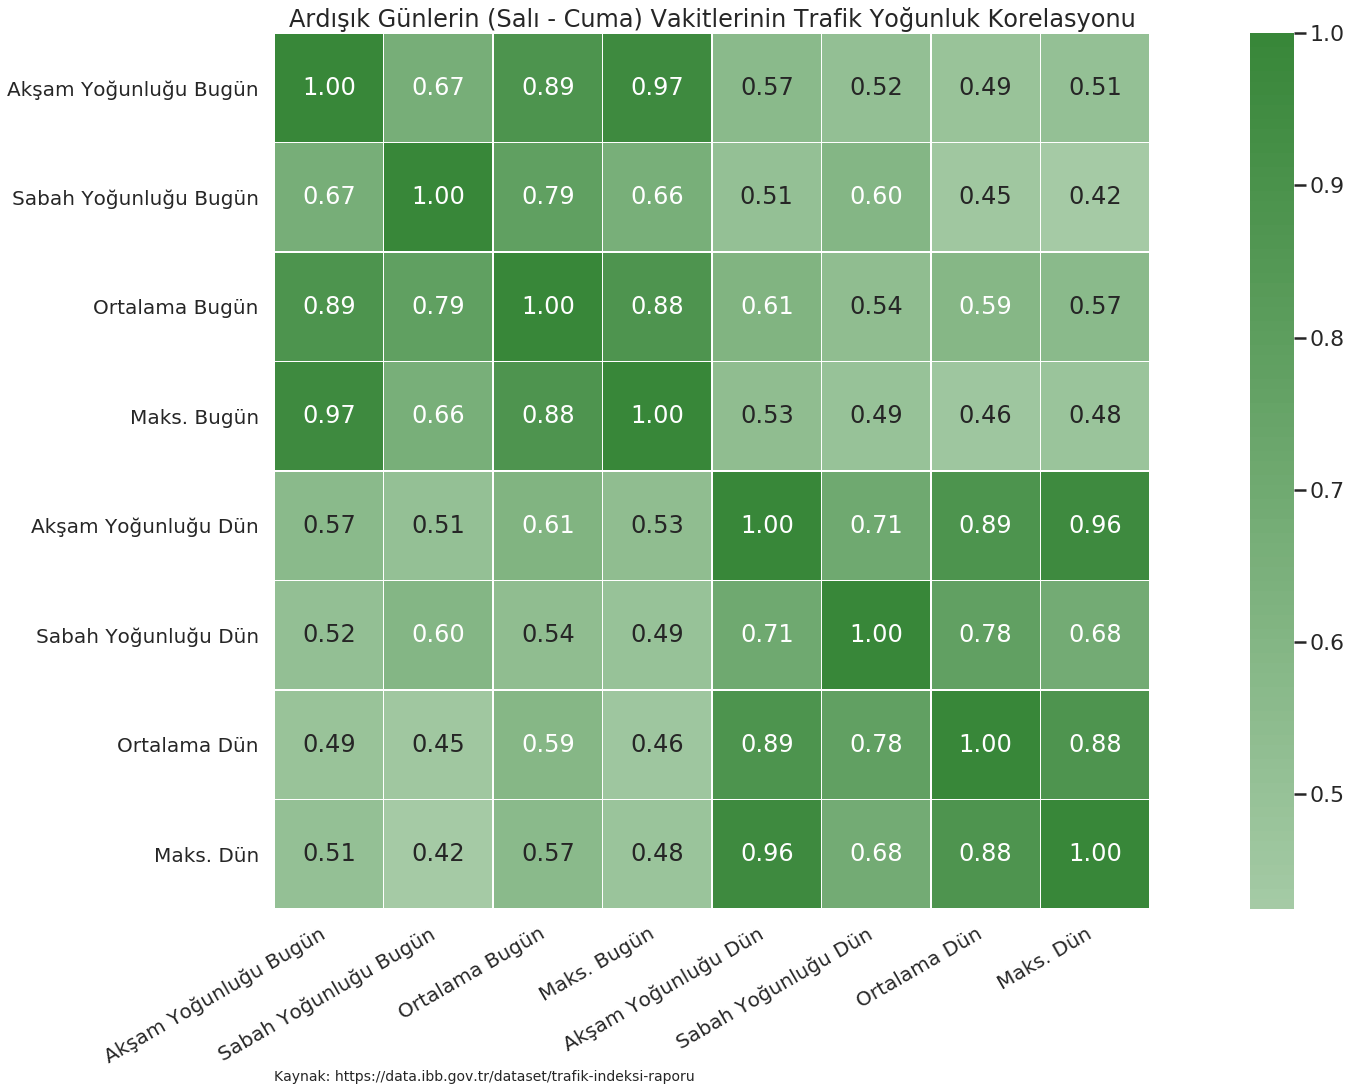

In [580]:
title = 'Ardışık Günlerin (Salı - Cuma) Vakitlerinin Trafik Yoğunluk Korelasyonu'
sns.set(context='poster',style='white')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))

# Heatmap. Ama renk paletimizi tersine çeviriyoruz (hm_pal.reversed()) çünkü pozitifler yeşil olsun istiyoruz.
p = sns.heatmap(corr, 
                cmap=hm_pal.reversed(), 
                center=0,
                square=True, 
                linewidths=.5,
                annot=True, 
                fmt='.2f',
                cbar=True,
                cbar_kws={"shrink": 1},
                ax=ax)

# Başlık
p.set_title(title, fontsize=24)

# X aksındakşi yazıları çevirelim. Zor okunuyor.
f.autofmt_xdate(bottom=0.5, rotation=30, ha='right')

# Akslardaki yazıların boyu
p.tick_params(labelsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.2)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

In [581]:
# Farklar belki daha açıklayıcı olur absolüt değerlee göre
df_vakit_2day_safe.loc[: , 'Sabah Farkı'] = (df_vakit_2day.loc[:, 'Sabah Yoğunluğu Bugün'] 
                                        - df_vakit_2day.loc[:, 'Sabah Yoğunluğu Dün'])
df_vakit_2day_safe.loc[: , 'Akşam Farkı'] = (df_vakit_2day.loc[:, 'Akşam Yoğunluğu Bugün'] 
                                        - df_vakit_2day.loc[:, 'Akşam Yoğunluğu Dün'])
df_vakit_2day_safe.loc[: , 'Ortalama Farkı'] = (df_vakit_2day.loc[:, 'Ortalama Bugün'] 
                                        - df_vakit_2day.loc[:, 'Ortalama Dün'])
df_vakit_2day_safe.loc[: , 'Maks. Farkı'] = (df_vakit_2day.loc[:, 'Maks. Bugün'] 
                                        - df_vakit_2day.loc[:, 'Maks. Dün'])
# Gün isimlerini Türkçeye çevirelim (bunu lokalizayonla halletmenin yolu yok mu?)
df_vakit_2day_safe.replace(['Tuesday' , 'Wednesday', 'Thursday', 'Friday'], 
                          ["Salı", "Çarşamba", "Perşembe","Cuma"], inplace=True)
# Sıra bozulmasın diye kategoriye çevirelim.
safe_days_type = CategoricalDtype(categories=["Salı", "Çarşamba", "Perşembe","Cuma"], ordered=True)
df_vakit_2day_safe['Haftanın Günü'] = df_vakit_2day_safe['Haftanın Günü'].astype(safe_days_type)

# Pandas çok şikayet ediyor bunlara. Ama sorun yok.

/Users/sinan/miniconda3/envs/stuff/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sinan/miniconda3/envs/stuff/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/sinan/miniconda3/envs/stuff/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [582]:
# Korelasyon matrisi kalabalık olmasın diye gereksizleri çıkartalım.
df_vakit_2day_diffs_safe = df_vakit_2day_safe.drop(columns=[
    'Sabah Yoğunluğu Bugün', 
    'Akşam Yoğunluğu Bugün', 
    'Ortalama Bugün', 
    'Maks. Bugün'])
corr = df_vakit_2day_diffs_safe.corr()

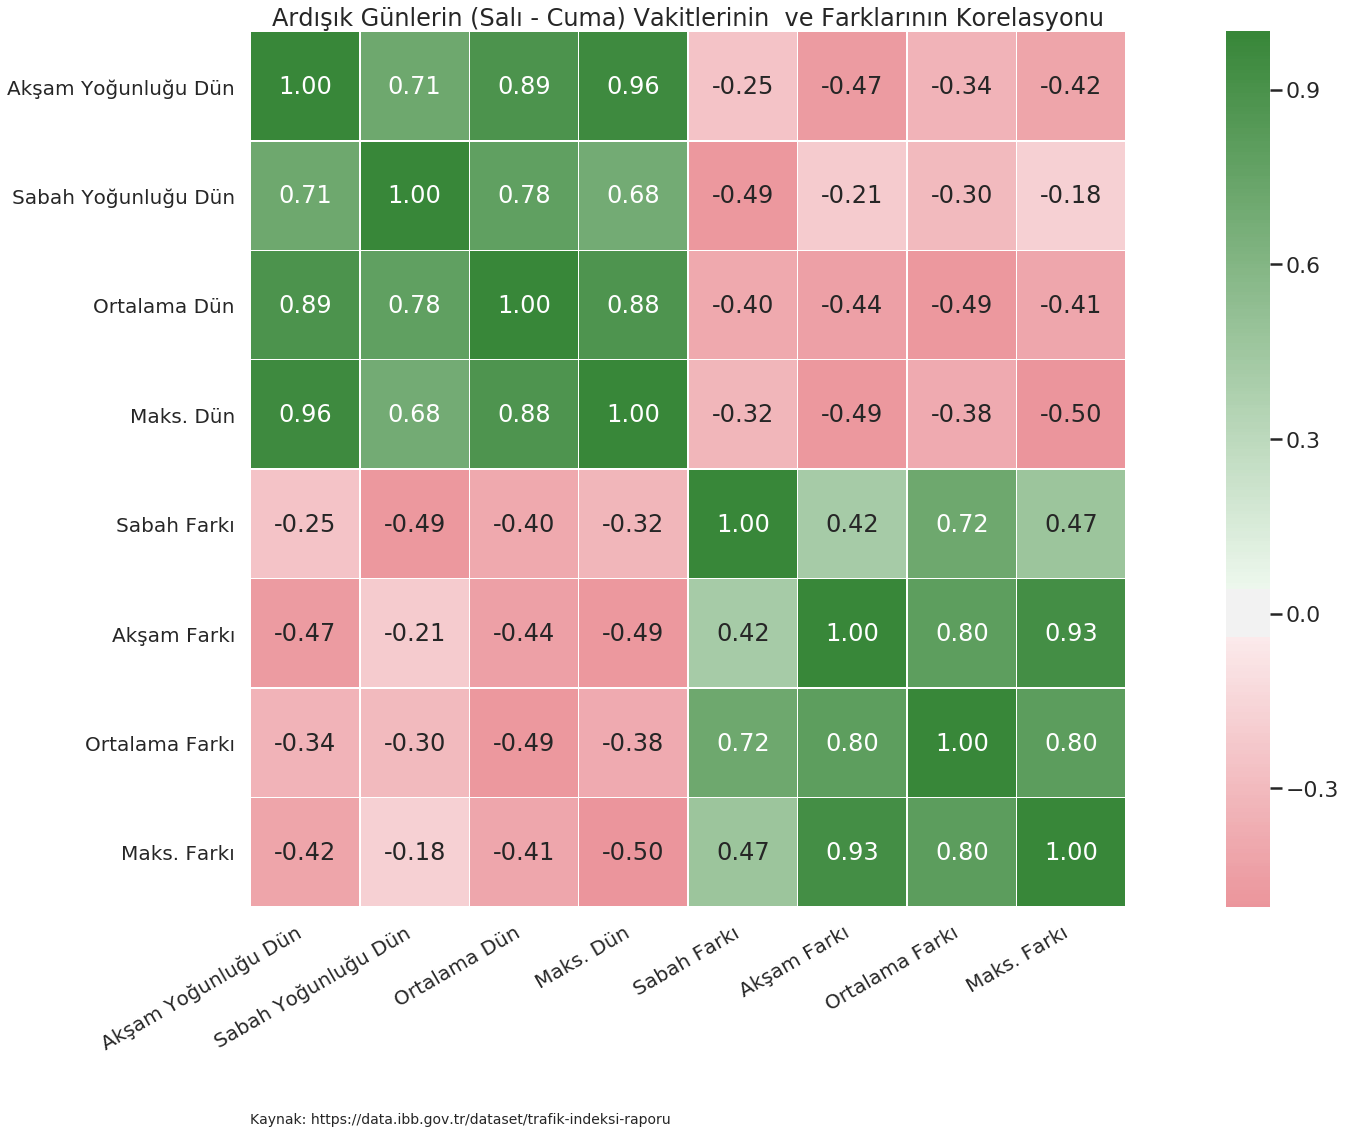

In [583]:
title = 'Ardışık Günlerin (Salı - Cuma) Vakitlerinin  ve Farklarının Korelasyonu'
sns.set(context='poster',style='white')
# Heatmap
f, ax = plt.subplots(figsize=(36, 32))

# Heatmap. Ama renk paletimizi tersine çeviriyoruz (hm_pal.reversed()) çünkü pozitifler yeşil olsun istiyoruz.
p = sns.heatmap(corr, 
                cmap=hm_pal.reversed(), 
                center=0,
                square=True, 
                linewidths=.5,
                annot=True, 
                fmt='.2f',
                cbar=True,
                cbar_kws={"shrink": 1},
                ax=ax)

# Başlık
p.set_title(title, fontsize=24)

# X aksındakşi yazıları çevirelim. Zor okunuyor.
f.autofmt_xdate(bottom=0.5, rotation=30, ha='right')

# Akslardaki yazıların boyu
p.tick_params(labelsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.25)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

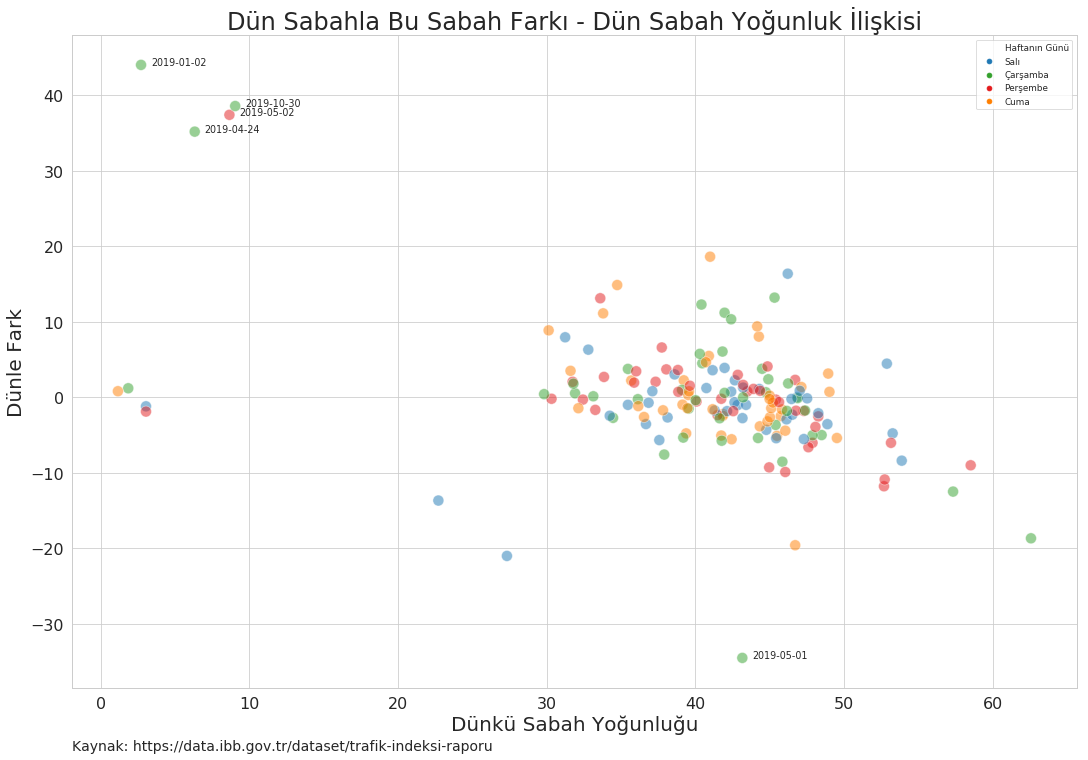

In [584]:
title = 'Dün Sabahla Bu Sabah Farkı - Dün Sabah Yoğunluk İlişkisi'
# Dün sabahla fark vs dün sabah trafik
sns.set(context='paper', style='whitegrid')

# Scatter
f, ax = plt.subplots(figsize=(18, 12))

p = sns.scatterplot(
       x='Sabah Yoğunluğu Dün', 
       y='Sabah Farkı', 
       hue='Haftanın Günü', 
       sizes=None, 
       data=df_vakit_2day_safe,
       palette=[paired_pal[1], paired_pal[3], paired_pal[5], paired_pal[7]], 
       markers="o",
       legend='brief', 
       ax=ax,
       s=120,
       alpha=.5)

# Ekstrem değelerin ne olduğunu da görelim
x_offsetpercent = 0.01
y_offsetpercent = 0
x_offset = ((plt.xlim()[1] - plt.xlim()[0])) * x_offsetpercent
y_offset = ((plt.ylim()[1] - plt.ylim()[0])) * y_offsetpercent

x = df_vakit_2day_safe['Sabah Yoğunluğu Dün']
y = df_vakit_2day_safe['Sabah Farkı']
t = df_vakit_2day_safe.index
cor = zip(x, y, t)

for x, y, t in cor:
    if y > 30 or y < -30:
        p. annotate(t.date(), (x + x_offset, y + y_offset))

# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Sabah Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

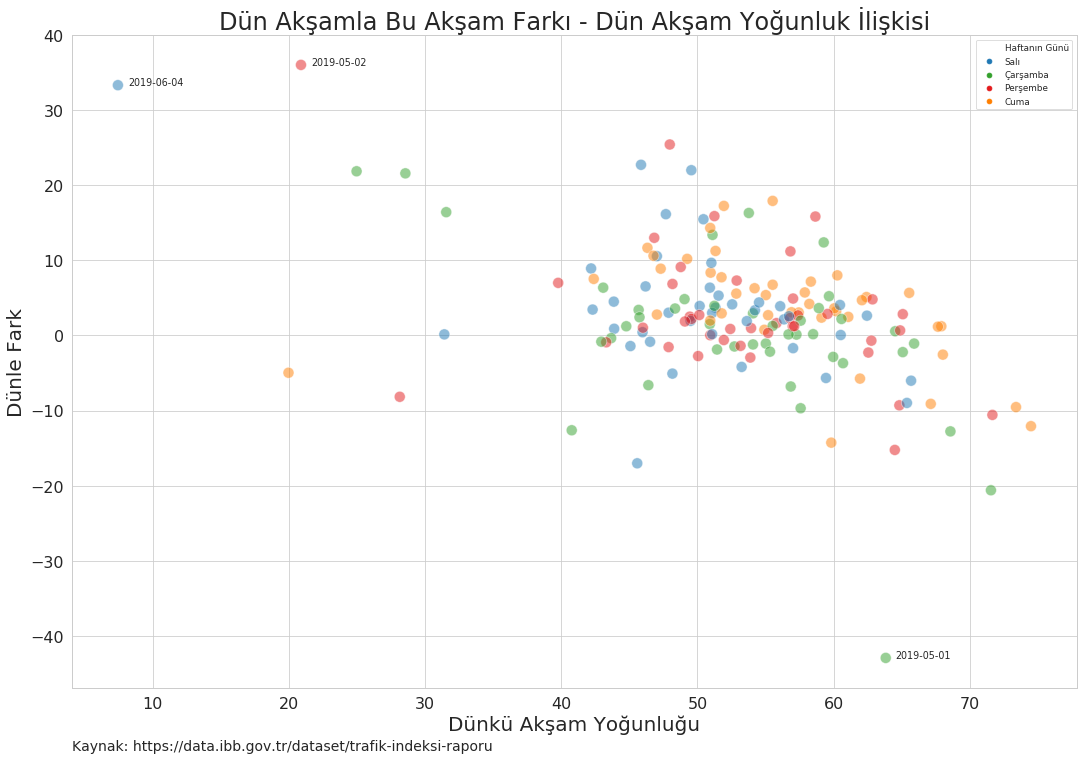

In [585]:
title = 'Dün Akşamla Bu Akşam Farkı - Dün Akşam Yoğunluk İlişkisi'
# Dün akşamla fark vs dün akşam trafik
sns.set(context='paper', style='whitegrid')

# Scatter
f, ax = plt.subplots(figsize=(18, 12))

p = sns.scatterplot(
       x='Akşam Yoğunluğu Dün', 
       y='Akşam Farkı', 
       hue='Haftanın Günü', 
       sizes=None, 
       data=df_vakit_2day_safe,
       palette=[paired_pal[1], paired_pal[3], paired_pal[5], paired_pal[7]], 
       markers="o",
       legend='brief', 
       ax=ax,
       s=120,
       alpha=.5)

# Ekstrem değelerin ne olduğunu da görelim
x_offsetpercent = 0.01
y_offsetpercent = 0
x_offset = ((plt.xlim()[1] - plt.xlim()[0])) * x_offsetpercent
y_offset = ((plt.ylim()[1] - plt.ylim()[0])) * y_offsetpercent

x = df_vakit_2day_safe['Akşam Yoğunluğu Dün']
y = df_vakit_2day_safe['Akşam Farkı']
t = df_vakit_2day_safe.index
cor = zip(x, y, t)

for x, y, t in cor:
    if y > 30 or y < -30:
        p. annotate(t.date(), (x + x_offset, y + y_offset))


# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Akşam Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

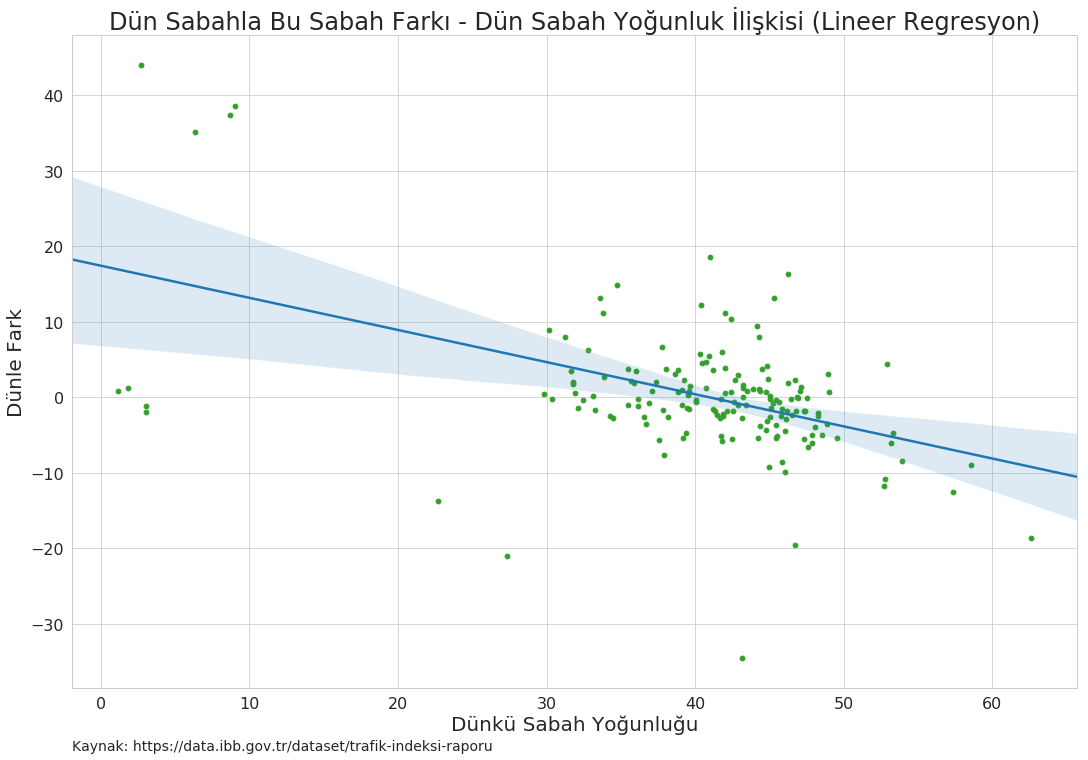

In [586]:
title = 'Dün Sabahla Bu Sabah Farkı - Dün Sabah Yoğunluk İlişkisi (Lineer Regresyon)'
# Dün sabahla fark vs dün sabah trafik, lineer regresyon
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=df_vakit_2day_safe, 
                x='Sabah Yoğunluğu Dün', 
                y='Sabah Farkı', 
                scatter=True,
                fit_reg=True,
                marker="o",
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1},
                ax=ax)
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Sabah Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

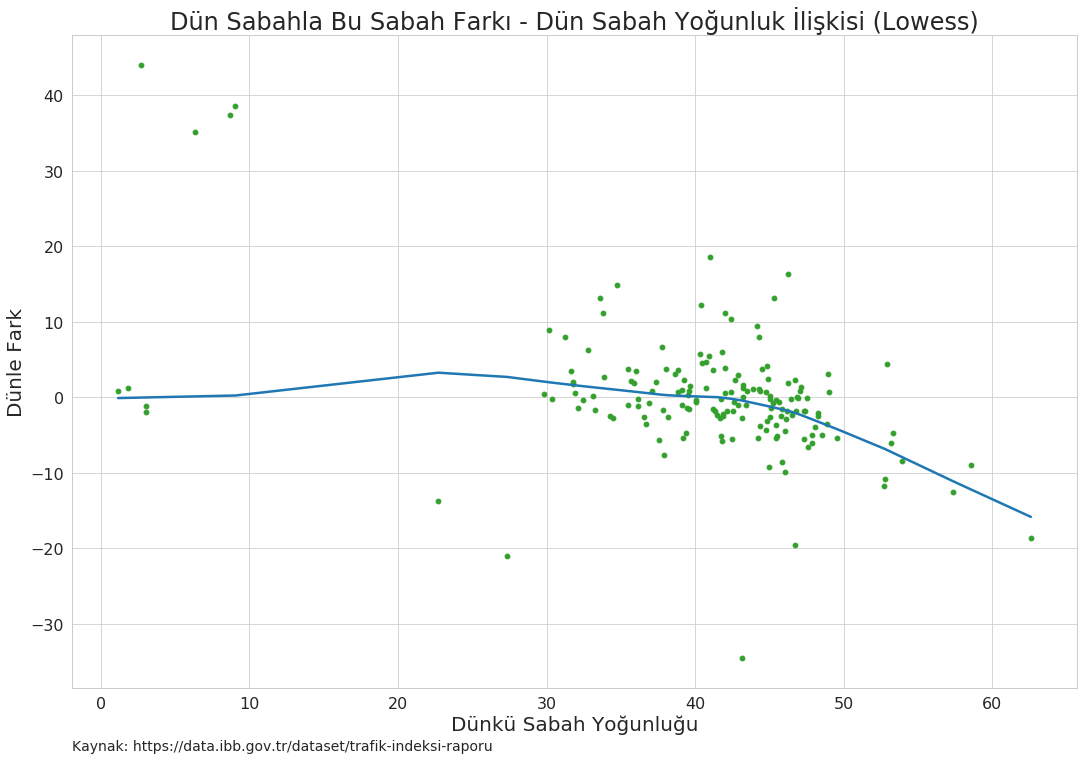

In [587]:
title = 'Dün Sabahla Bu Sabah Farkı - Dün Sabah Yoğunluk İlişkisi (Lowess)'
# Dün sabahla fark vs dün sabah trafik, Locally Weighted Linear Regression (Loess)
# https://xavierbourretsicotte.github.io/loess.html
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=df_vakit_2day_safe, 
                x='Sabah Yoğunluğu Dün', 
                y='Sabah Farkı', 
                scatter=True,
                lowess=True,
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1})
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Sabah Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

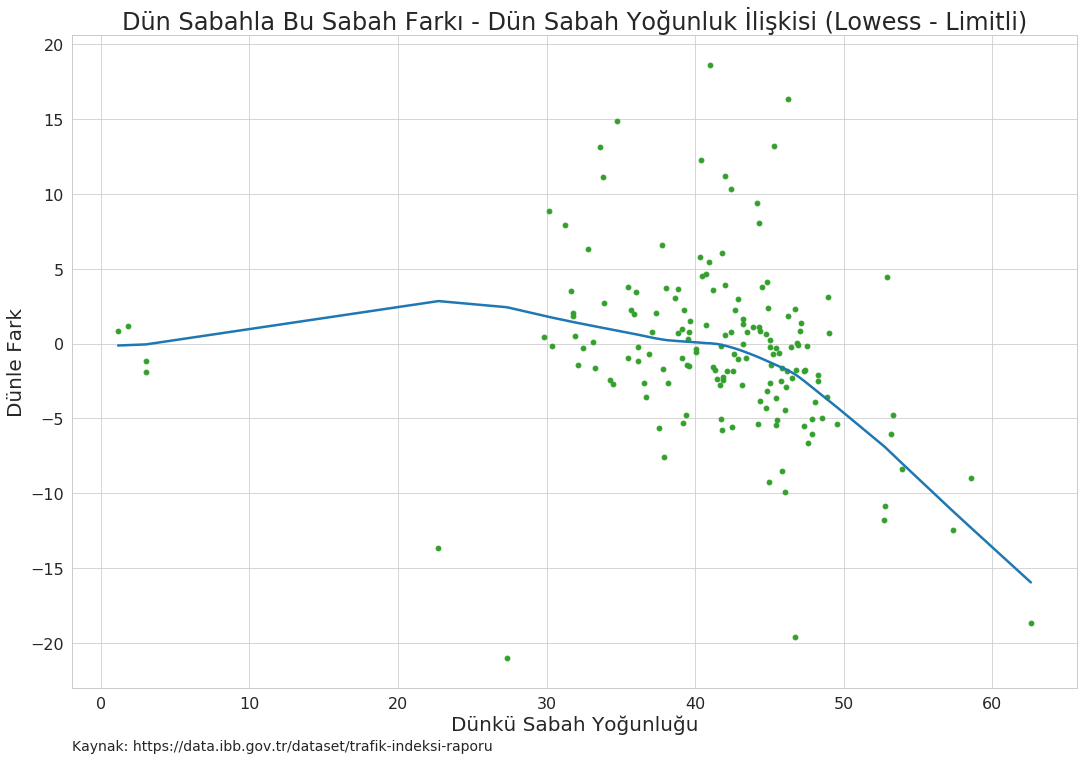

In [588]:
title = 'Dün Sabahla Bu Sabah Farkı - Dün Sabah Yoğunluk İlişkisi (Lowess - Limitli)'

# Ekstrem fark olan günleri çıkartırsak
temp_df = df_vakit_2day_safe[(df_vakit_2day_safe['Sabah Farkı'] <= 30) & (df_vakit_2day_safe['Sabah Farkı'] >= -25)].copy()

# Dün sabahla fark vs dün sabah trafik
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=temp_df, 
                x='Sabah Yoğunluğu Dün', 
                y='Sabah Farkı', 
                scatter=True,
                lowess=True,
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1})
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Sabah Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

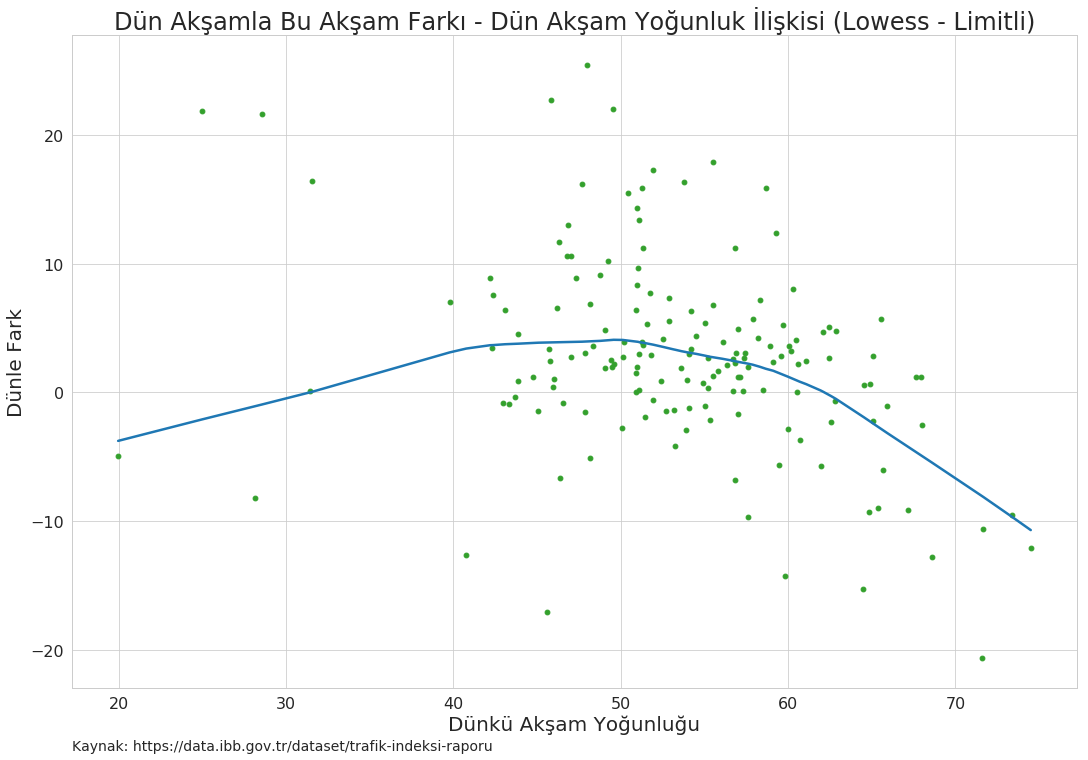

In [589]:
title = 'Dün Akşamla Bu Akşam Farkı - Dün Akşam Yoğunluk İlişkisi (Lowess - Limitli)'

# Ekstrem fark olan günleri çıkartırsak
temp_df = df_vakit_2day_safe[
    (df_vakit_2day_safe['Akşam Farkı'] <= 30) & (df_vakit_2day_safe['Akşam Farkı'] >= -30)].copy()

# Dün sabahla fark vs dün sabah trafik
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=temp_df, 
                x='Akşam Yoğunluğu Dün', 
                y='Akşam Farkı', 
                scatter=True,
                lowess=True,
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1})
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Akşam Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()


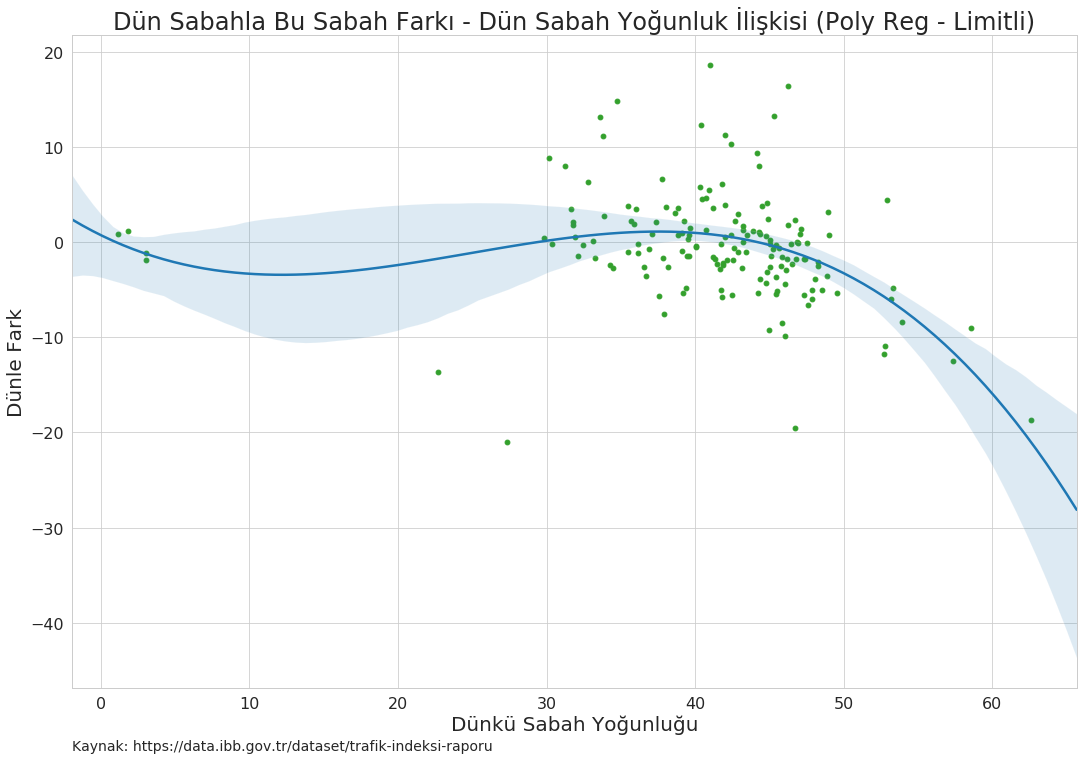

In [590]:
title = 'Dün Sabahla Bu Sabah Farkı - Dün Sabah Yoğunluk İlişkisi (Poly Reg - Limitli)'

# Ekstrem değerleri çıkartım polynominal bir regresyon deneyelim.
temp_df = df_vakit_2day_safe[
    (df_vakit_2day_safe['Sabah Farkı'] <= 30) & (df_vakit_2day_safe['Sabah Farkı'] >= -25)].copy()

# Dün sabahla fark vs dün sabah trafik
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=temp_df, 
                x='Sabah Yoğunluğu Dün', 
                y='Sabah Farkı', 
                scatter=True,
                order=3,
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1})
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Sabah Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

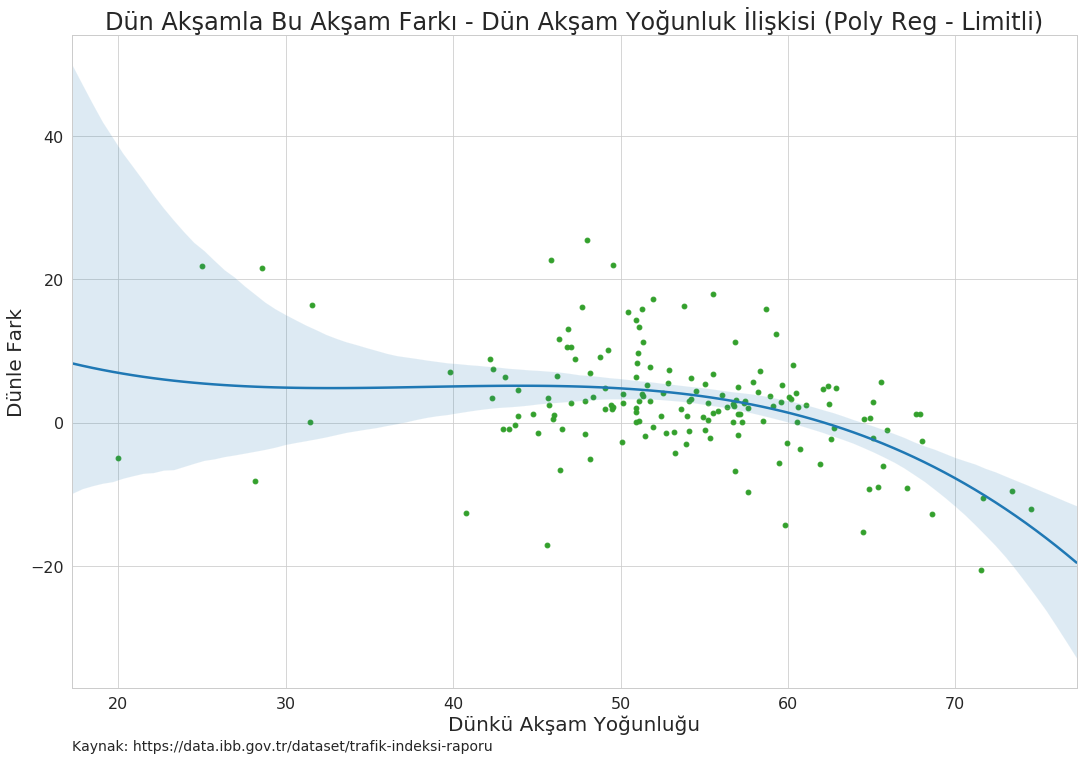

In [591]:
title = 'Dün Akşamla Bu Akşam Farkı - Dün Akşam Yoğunluk İlişkisi (Poly Reg - Limitli)'

# Ekstrem değerleri çıkartım polynominal bir regresyon deneyelim.
temp_df = df_vakit_2day_safe[(df_vakit_2day_safe['Akşam Farkı'] <= 30) & (df_vakit_2day_safe['Akşam Farkı'] >= -30)].copy()

# Dün sabahla fark vs dün sabah trafik
sns.set(context='paper', style='whitegrid')
# Line ve scatter
f, ax = plt.subplots(figsize=(18, 12))

# Günlük veriyi scatterplot olarak ekleyelim
p = sns.regplot(data=temp_df, 
                x='Akşam Yoğunluğu Dün', 
                y='Akşam Farkı', 
                scatter=True,
                order=3,
                line_kws={'color': paired_pal[1], 'lw': 2.5},
                scatter_kws={'color': paired_pal[3], 'alpha': 1})
# Başlık
p.set_title(title, fontsize=24)

# Akslardaki yazıların boyu
p.tick_params(labelsize=16)
p.set_ylabel("Dünle Fark", fontsize=20)
p.set_xlabel("Dünkü Akşam Yoğunluğu", fontsize=20)

leftx = plt.xlim()[0]
bottomy = plt.ylim()[0] - ((plt.ylim()[1] - plt.ylim()[0]) * 0.1)

# Notumuz.
p.text(leftx, bottomy, KAYNAK, 
       ha ='left', 
       fontsize = 14,
       verticalalignment='bottom')

all_figures[title] = f
plt.show()

In [592]:
# Save all figures
import os
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
for title, figure in all_figures.items():
    figure.savefig(fig_path+title+".png", dpi=600, transparent=False, bbox_inches='tight', pad_inches=0.1)